# **workflow**

1. pick a problem scenario
2. make a fictional interdisciplinary team like you outlined
3. write out what that interdisciplinary team would have to do to truly inspire us about excellent work in ML fairness
4. critique what we see: how well existing tools would serve their needs, what opportunities there are for new kinds of fairness tools, how well this aligns with HCI research.
5. iterate on it, or try another kind of scenario

--- up the ladder ---
1. find out where data comes from. uestions?
2. look at data (eg, features, distributions)
3. any mismatch?

feel (mostly: professionalism, secondarily: excellence, not as much: responsibility)
- rtfm
- did you even google it
- at least ask the question
- analogy: defense in depth

# outline beats
1. This dataset is widely available and commonly used in educational settings.
2. Fairness in housing was deeply contested in the Boston area at the time this data was produced in the 1970s.
3. Racial prejudice is explicitly modeled in this dataset.
4. This dataset was never intended to be used for predicting house values.
5. Other publications have raised major questions about the methodology encoded within the original dataset.
6. There are data quality issues even if the "corrected" datasets that are publicly available.



# 1. Introduction
This notebook explores the "Boston housing" dataset, first introduced in a 1978 paper on estimating the price of air quality, and commonly used in machine learning tutorials to this day in 2020.

Despite being used in tutorials for scikit-learn, R, Kaggle and books like Deep Learning with JavaScript, I found no tutorials that considered any sociotechnical context on the dataset.

This tutorial looks at the dataset from our perspective, deep learning with sociotechnical perspectives.







# 2. Getting the data
Let's see what happens if we search for "boston housing dataset".  Here's what comes up in the top 10 search results (April 2020):

Data science librarires:
- scikit-learn
- R: https://www.rdocumentation.org/packages/mlbench/versions/2.1-1/topics/BostonHousing

Dataset repositories:
- https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
- https://www.kaggle.com/altavish/boston-housing-dataset
- https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Posts and articles:
- https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
- https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
- https://howilearnstatistics.com/post/data-analysis-with-r-boston-housing-dataset/

Within scikit-learn, there are 9 examples in their docs based on this dataset:
- Advanced Plotting With Partial Dependence
- Plot individual and voting regression predictions
- Gradient Boosting regression
- Combine predictors using stacking
- Outlier detection on a real data set
- Model Complexity Influence
- Feature selection using SelectFromModel and LassoCV
- Imputing missing values before building an estimator
- Plotting Cross-Validated Predictions
- Effect of transforming the targets in regression model

From looking through some of these, we can find the original citation for this dataset.  We'll explore that in the next section before we look at the data, but it's important to note that **zero** of these sources reference why this dataset was collected, and what the original paper used it to do.

# 3. Where did this data come from?

In searching around further, I found the [Corrected Boston Housing Data](https://nowosad.github.io/spData/reference/boston.html) page in the R package for [spData](https://nowosad.github.io/spData/index.html).  This is also hosted at [rdocumentation.org](https://www.rdocumentation.org/packages/spdep/versions/0.6-15/topics/boston).

The spData package has some interesting information.  First, it cites the data as coming from http://lib.stat.cmu.edu/datasets/boston_corrected.txt.  Second, it cites some other secondary analyses and data quality issues that they raise.

One key point they raise is that:

> Gilley and Pace also point out that MEDV is censored, in that median values at or over USD 50,000 are set to USD 50,000.

So some clipping has already been applied to this dataset.  We'll see that when we visualize it below.


## a. Harrison and Rubinfeld (1976)
Searching online, I found [this PDF](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y) from a University of Michigan library.  Some other interesting results came up on the first page of search results, and we'll come back to those later as well.

The paper is entitled "Hedonic housing prices and the demand for clean air" and it offers "quantitative estimates of the willingness to pay for air quality improvements."  So this core work of this paper is to make estimates about how air quality measures are priced into house prices.  I did not see that coming :)

The core idea is based on the "presumption that individuals will pay more for a unit located in an area with good air quality than for an otherwise identical unit located in an area with poor air quality."  The "hedonic pricing" methodology, where bags of attributes are described, and prices are decomposed into the contributions of each attribute, was relatively recent at the time (eg, [Rosen 1974](https://agecon2.tamu.edu/people/faculty/capps-oral/agec%20635/Readings/Hedonic%20Prices%20and%20Implicit%20Markets%20Product%20Differentiation%20in%20Pure%20Competition.pdf)), but the authors reference five other studies that have tried this approach.  They also note that there are significant questions about whether it will be effective, and they also acknowledge that "we proceed under the assumption that it is possible to identify households’ willingness to pay for clean air from the housing market data".  As a side note, it's interesting to see how openly these kinds of questions are raised while also being so shallowly considered.  They seem refreshing but somewhat anachronistic to me as a reader in 2020, where I typically see either deep or zero engagement with these kinds of foundational validity questions.

But the bottom line is that as a practioner, it's important to know that by `pip installing` this data set, you're installing a lot of design choices laden with assumptions and ideologies that may not be appropriate in the particular sociotechnical context you are working in.

### Median value within tract
So, where did the data on housing prices come from?

> This study utilizes data for census tracts in the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Following the example of most studies of this kind, we focus on the owner market. Thus, the dependent variable in our housing equation is the median value of the owner-occupied homes in the census tract.

The selection of only owner-occupied homes is important to know, but we'll leave that alone until it surfaces again later.

### log(mv)
Importantly, they also do not fit their model directly on the median house value.  This is because:

> Comparing models with either median value of owner-occupied homes (MV) or Log( MV) as the dependent variable, we found that the semilog version provided a slightly better fit. 

### Equation
They fit the equation and say that:

> The equation conforms well to our a priori expectations about the influence of each variable on median housing values. Virtually all coefficients have the expected sign and are statistically sig- nificant.


## b. Belsley et al. (1980)
In the UCI metadata, it cites [Belsely et al. (1980)]https://onlinelibrary.wiley.com/doi/book/10.1002/0471725153).  Interestingly, all three authors are from the Boston area as well.  This textbook was republished in [2013](https://www.wiley.com/en-us/Regression+Diagnostics%3A+Identifying+Influential+Data+and+Sources+of+Collinearity-p-9780471691174).

The relevant section is "4.4 Robust Estimation of a Hedonic Housing-Price Equation."


# Choices in methodology

### Hedonic prices (Rosen 1974)
**Hedonic Prices and Implicit Markets: Product Differentiation in Pure Competition ([Rosen 1974](https://agecon2.tamu.edu/people/faculty/capps-oral/agec%20635/Readings/Hedonic%20Prices%20and%20Implicit%20Markets%20Product%20Differentiation%20in%20Pure%20Competition.pdf ))**

In the Rosen (1974) paper, there were two things that I found really interesting and worth noting.

First, the paper is called "Hedonic Prices and Implicit Markets: Product Differentiation in Pure Competition," and I noticed the "pure competition."  Harrison and Rubinfeld made the choice to apply this model that assumes "pure competition" to the housing market around Boston in 1978.  For now we'll note that there are many critiques to be made of making that design decision when working in that particular sociotechnical context, and come back to that point later.  

Second, the paper also describes that this methodology makes the assumption that "products in the class are completely described by numerical values of z."  This is of course a common modeling assumption; the model only operates on the map that modelers choose to give it.  So the choices that modelers make, and how well the maps they choose match the territory out in the real world, are always important to consider in any research.

One simple critique of Harrison and Rubinfeld is how limited their description is of producers and consumers.  Another is to use a methodology for modeling the housing market that assumes "Both consumers and producers base their locational and quantity decisions on maximizing behavior... buyers and sellers are perfectly matched." (Rosen 1974).  As the Rosen paper states, even its methodology assumes that "No individual can improve his position, and all optimum choices are feasible."  When we look at the broader sociotechnical context below, we'll see some evidence suggesting this makes Harrison and Rubinfeld's design choices particularly troubling.

Consider this graphical representation of the housing market in Boston in 1970s:

...

But more fundamentally, the Harrison paper applies the hedonic modeling approach in Rosen (1974) to aggregated buying and selling decisions aggregated to census tracts.  This decision essentially tramples over any of the more subtle questions aobut whether the assumptions and constraints of the Rosen methodology are appropriate for modeling the housing market in 1970s Boston.  Take for example this assumption, directly stated in Rosen:

> The components of *z* are objectively measured in the sense that all consumers' perceptions or readings of the amount of characteristics embodied in each good are identical, though of course consumers may differ in their subjective valuations of alternative packages.

To state this in terms of Harrison and Rubinfeld, this assumption means that *all buyers of homes in a census tract* have the identical perception of the components of *all housing in a census tract, aggregated*.  Even in other marketplaces outside of housing that function in ways that more closely approximate idealized pure markets, it is hard to understand how this assumption would make sense to any modeling problem in any sociotechnical context.  But of course Rosen also stated that directly:

> As will be apparent, this assumption represents an enormous simplification of the problem. It is obviously better approximated in some markets than others, and there is no need to belabor its realism... possibilities for resale of used items in secondhand markets are ignored, either by assuming that secondhand markets do not exist, or alternatively, that goods represent pure consumption.

The "production decision" is characterized as answering the question as to "What package of characteristics is to be assembled?"  Perhaps a reasonable question when applying this model to the housing market might be: what percentage of the housing stock has been "assembled" in the last decade?  Or further, how many housing producers are able to freely assemble products that have a particular location that consumer perceive as valuable?  Are there any limitations to their choices in assembling products that are described by such vectors?  Here is Rosen's caveat:

> The discussion is limited to the case of nonjoint production, in which each production establishment within the firm specializes in one design, and there are no cost spillovers from plant to plant. Thus a  "firm" is an arbitrary collection of atomistic production establishments, each one acting independently of the others. Analytical difficulties arising from true joint production are noted in passing.

Readers can judge whether this describes what they undersatand about the housing market.

Rosen of course never intends to apply this methodology to the housing market.  But when he does mention housing, ironically it's in relation to fairness:

> the above specification is  very similar in spirit to Tiebout's (1956) analysis of the implicit market for neighborhoods, local public goods being the "characteristics" in this case. He obtained the result that neighborhoods tend to be segmented by distinct income and taste groups (also, see Ellickson 1971).

If you're curious, here's a summary of Teibout (1956) from Wikipedia:

> This model holds that individual choices on where to live would lead to the equilibrium provision of local public goods in accordance with the tastes of residents, *thereby sorting the population into optimum communities*. Basically, if an individual doesn’t like the public goods provision of one town, they can move to the next town over.

And if you're curious about [Ellickson (1971)](https://www.jstor.org/stable/1817011?seq=1), here's a relevant quote from the first page:

(CUT):
> Wealthy communities were unwilling to enter into cooperative agreements with  less wealthy communities.  Only when their wealth was about the same would cities agree to engage in a jointly financed program.


To close our discussion of Rosen, here's a section from the conclusion verbatim:

> The economic content of the relationship between observed prices and observed characteristics becomes evident once price differences among goods are recognized as equalizing differences for the alternative packages they embody. Here, as elsewhere, price differences generally are equalizing only on the margin and not on the average. Hence, *estimated hedonic price-characteristics functions typically identify neither demand nor supply.* In fact, those observations are described by a joint-envelope function and *cannot by themselves identify the structure of consumer preferences and producer technologies that generate them.*


In http://www.spatial-statistics.com/pace_manuscripts/spatial_statistics_real_estate/web_sintro1.pdf there are many explicit critiques of this methodology.

TypeError: ignored

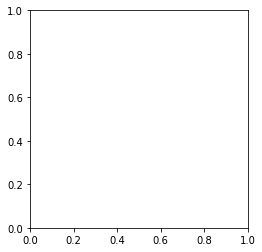

In [0]:
import matplotlib.pyplot as plt
plt.imshow("https://i.postimg.cc/1tfGq2Rt/Screen-Shot-2020-05-07-at-2-12-47-PM.png")

# 3. Related papers
In searching online, and checking "related papers" in different citation systems, I found a few important references to this study.  These included "On the Harrison and Rubinfeld Data" which laments that:

> Essentially, a cottage industry has sprung up around using these data to examine alternative statistical techniques.  Unfortunately, these data have some incorrectly coded observations and an unsuspected censoring problem.

Another line of work cites the original paper as "A Case Study in the Challenges of System Articulation":

> [More] scholars are addressing empirical questions using spatial and spatio-temoral data. An emerging Challenge is to alert “new arrivals” to existing bodies of knowledge that can inform the ways in which they structure their work. It is a particular matter of opportunity and concern that most of the data used is secondary. 

So it seems like these papers are speaking directly to our kind of audience, folks who are "new arrivals" and where data is used for purposes other than its original design and intention.


## a. "On the Harrison and Rubinfeld Data"
From [Gilley and Pace (1996)](https://www.sciencedirect.com/science/article/abs/pii/S0095069696900522?via%3Dihub) and [Pace and Gilley (1997)](https://link.springer.com/article/10.1023/A:1007762613901), both in the Journal of Real Estate Finance and Economics.

I couldn't find this paper online, but did find Dr. Pace, and so tried emailing him:

> Hi Dr. Pace,
>
> My name's Kevin Robinson, and I'm doing some work looking at how the Boston Housing Dataset has evolved and been interpreted over time.  I'm wondering if you'd be willing to share a copy of your 1997 paper?
> 
> Pace, R. and Gilley, O. (1997). Using the Spatial Configuration of Data to Improve Estimation. Journal of Real Estate Finance and Economics, 14(3), 333-340.
> 
> Thanks!
> -Kevin

I didn't hear back, so still can't find a copy of that paper.


## b. "Revisiting the Boston data set"
From [Bivand 2015](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2719454) and [Bivand 2017](https://openjournals.wu.ac.at/ojs/index.php/region/article/view/107).

> Harrison, Rubinfeld (1978c)... [their] primary interest was in estimating willingness to pay for cleaner air. They chose to use 506 census tracts as units of observation because median house values for these units of aggregation were published in the 1970 census tabulations... by re-aggregating the house value data to the 96 air pollution model output zones and re-fitting the regression model, the total impact of air pollution on house values, and thus the estimated willingness to pay, increases markedly.. the total impact of air pollution on median house values, and consequently on the willingness to pay analysis, increases by over three times... **It is shown conclusively that the choice of observational units matters crucially** for the estimation of economic parameters of interest in this data set.

This is a methodological critique published almost 40 years later.

## c. Other papers
- [Chen et al. (2017)](https://www.sciencedirect.com/science/article/abs/pii/S0301421517303282) is an analysis of the impact of air pollution on the housing market in China.

## d. Other links
- CMU, [Boston Corrected](http://lib.stat.cmu.edu/datasets/boston_corrected.txt)
- U Toronto, [Boston Housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
- spData: [Corrected Boston Housing Data](https://nowosad.github.io/spData/reference/boston.html)
- [Data Analysis with R, Boston Housing Dataset](https://howilearnstatistics.com/post/data-analysis-with-r-boston-housing-dataset/)

# 5. Let's look at the data!
We'll start with http://lib.stat.cmu.edu/datasets/boston_corrected.txt, and for now we'll trust that the "corrections" are meaningful and accurate.

First, let's look at what the numbers mean without yet asking how they were produced.  A few things jump out from the column definitions, like this one:

> b = 1000(B−0.63)2 where B is the proportion of blacks by town

So one of the features is a transformation of the proportion of black residents.  Let's see what happens if we search online for "boston 1970 race".  It seems like the first result is [Boston desegregation busing crisis](https://en.wikipedia.org/wiki/Boston_desegregation_busing_crisis).  I'm from Massachusetts so this is not a surprise to me, but if not I can get pretty good context within 60 seconds just by reading the first paragraph in Wikipedia:

> The desegregation of Boston public schools (1974–1988) was a period in which the Boston Public Schools were under court control to desegregate through a system of busing students. The call for desegregation and the first years of its implementation led to a series of racial protests and riots that brought national attention, particularly from 1974 to 1976. In response to the Massachusetts legislature's enactment of the 1965 Racial Imbalance Act, which ordered the state's public schools to desegregate, W. Arthur Garrity Jr. of the United States District Court for the District of Massachusetts laid out a plan for compulsory busing of students between predominantly white and black areas of the city. The hard control of the desegregation plan lasted for over a decade. It influenced Boston politics and contributed to demographic shifts of Boston's school-age population, leading to a decline of public-school enrollment and white flight to the suburbs. Full control of the desegregation plan was transferred to the Boston School Committee in 1988; in 2013 the busing system was replaced by one with dramatically reduced busing.

Okay, so that seems like pretty critical sociotechnical context for understanding this dataset.  Both authors of the original paper, David Jr. and Daniel L., hailed from Harvard University in Cambridge, MA.  It seems likely that when they wrote this paper in 1976 they would be unaware of "racial protests and riots that brought national attention, particularly from 1964 to 1976."  Unfortunately they do not reference any of this context in their paper, or their decision to include racial demographic information.  Perhaps they assumed this context would self-evident to their audiecne.

Even so, I still don't quite understand what the transformation is, or where that `0.63` parameter comes from.

In [0]:
#

## csv data

In [0]:
#@title
csv = """
OBS.	TOWN	TOWN#	TRACT	LON	LAT	MEDV	CMEDV	CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT
1	Nahant	0	2011	-70.955000	42.255000	24.0	24.0	0.00632	18.0	2.31	0	0.538	6.575	65.2	4.0900	1	296	15.3	396.90	4.98
2	Swampscott	1	2021	-70.950000	42.287500	21.6	21.6	0.02731	0.0	7.07	0	0.469	6.421	78.9	4.9671	2	242	17.8	396.90	9.14
3	Swampscott	1	2022	-70.936000	42.283000	34.7	34.7	0.02729	0.0	7.07	0	0.469	7.185	61.1	4.9671	2	242	17.8	392.83	4.03
4	Marblehead	2	2031	-70.928000	42.293000	33.4	33.4	0.03237	0.0	2.18	0	0.458	6.998	45.8	6.0622	3	222	18.7	394.63	2.94
5	Marblehead	2	2032	-70.922000	42.298000	36.2	36.2	0.06905	0.0	2.18	0	0.458	7.147	54.2	6.0622	3	222	18.7	396.90	5.33
6	Marblehead	2	2033	-70.916500	42.304000	28.7	28.7	0.02985	0.0	2.18	0	0.458	6.430	58.7	6.0622	3	222	18.7	394.12	5.21
7	Salem	3	2041	-70.936000	42.297000	22.9	22.9	0.08829	12.5	7.87	0	0.524	6.012	66.6	5.5605	5	311	15.2	395.60	12.43
8	Salem	3	2042	-70.937500	42.310000	27.1	22.1	0.14455	12.5	7.87	0	0.524	6.172	96.1	5.9505	5	311	15.2	396.90	19.15
9	Salem	3	2043	-70.933000	42.312000	16.5	16.5	0.21124	12.5	7.87	0	0.524	5.631	100.0	6.0821	5	311	15.2	386.63	29.93
10	Salem	3	2044	-70.929000	42.316000	18.9	18.9	0.17004	12.5	7.87	0	0.524	6.004	85.9	6.5921	5	311	15.2	386.71	17.10
11	Salem	3	2045	-70.935000	42.316000	15.0	15.0	0.22489	12.5	7.87	0	0.524	6.377	94.3	6.3467	5	311	15.2	392.52	20.45
12	Salem	3	2046	-70.944000	42.317000	18.9	18.9	0.11747	12.5	7.87	0	0.524	6.009	82.9	6.2267	5	311	15.2	396.90	13.27
13	Salem	3	2047	-70.951000	42.306000	21.7	21.7	0.09378	12.5	7.87	0	0.524	5.889	39.0	5.4509	5	311	15.2	390.50	15.71
14	Lynn	4	2051	-70.964500	42.292000	20.4	20.4	0.62976	0.0	8.14	0	0.538	5.949	61.8	4.7075	4	307	21.0	396.90	8.26
15	Lynn	4	2052	-70.972000	42.287000	18.2	18.2	0.63796	0.0	8.14	0	0.538	6.096	84.5	4.4619	4	307	21.0	380.02	10.26
16	Lynn	4	2053	-70.976500	42.294000	19.9	19.9	0.62739	0.0	8.14	0	0.538	5.834	56.5	4.4986	4	307	21.0	395.62	8.47
17	Lynn	4	2054	-70.987000	42.298500	23.1	23.1	1.05393	0.0	8.14	0	0.538	5.935	29.3	4.4986	4	307	21.0	386.85	6.58
18	Lynn	4	2055	-70.978000	42.285000	17.5	17.5	0.78420	0.0	8.14	0	0.538	5.990	81.7	4.2579	4	307	21.0	386.75	14.67
19	Lynn	4	2056	-70.992500	42.282500	20.2	20.2	0.80271	0.0	8.14	0	0.538	5.456	36.6	3.7965	4	307	21.0	288.99	11.69
20	Lynn	4	2057	-70.988000	42.277600	18.2	18.2	0.72580	0.0	8.14	0	0.538	5.727	69.5	3.7965	4	307	21.0	390.95	11.28
21	Lynn	4	2058	-70.983500	42.277000	13.6	13.6	1.25179	0.0	8.14	0	0.538	5.570	98.1	3.7979	4	307	21.0	376.57	21.02
22	Lynn	4	2059	-70.982000	42.281000	19.6	19.6	0.85204	0.0	8.14	0	0.538	5.965	89.2	4.0123	4	307	21.0	392.53	13.83
23	Lynn	4	2060	-70.977500	42.279000	15.2	15.2	1.23247	0.0	8.14	0	0.538	6.142	91.7	3.9769	4	307	21.0	396.90	18.72
24	Lynn	4	2061	-70.973000	42.279000	14.5	14.5	0.98843	0.0	8.14	0	0.538	5.813	100.0	4.0952	4	307	21.0	394.54	19.88
25	Lynn	4	2062	-70.969300	42.281600	15.6	15.6	0.75026	0.0	8.14	0	0.538	5.924	94.1	4.3996	4	307	21.0	394.33	16.30
26	Lynn	4	2063	-70.964000	42.284000	13.9	13.9	0.84054	0.0	8.14	0	0.538	5.599	85.7	4.4546	4	307	21.0	303.42	16.51
27	Lynn	4	2064	-70.959700	42.287000	16.6	16.6	0.67191	0.0	8.14	0	0.538	5.813	90.3	4.6820	4	307	21.0	376.88	14.81
28	Lynn	4	2065	-70.959700	42.282500	14.8	14.8	0.95577	0.0	8.14	0	0.538	6.047	88.8	4.4534	4	307	21.0	306.38	17.28
29	Lynn	4	2066	-70.957000	42.280000	18.4	18.4	0.77299	0.0	8.14	0	0.538	6.495	94.4	4.4547	4	307	21.0	387.94	12.80
30	Lynn	4	2067	-70.951000	42.278000	21.0	21.0	1.00245	0.0	8.14	0	0.538	6.674	87.3	4.2390	4	307	21.0	380.23	11.98
31	Lynn	4	2068	-70.967000	42.279000	12.7	12.7	1.13081	0.0	8.14	0	0.538	5.713	94.1	4.2330	4	307	21.0	360.17	22.60
32	Lynn	4	2069	-70.964000	42.276500	14.5	14.5	1.35472	0.0	8.14	0	0.538	6.072	100.0	4.1750	4	307	21.0	376.73	13.04
33	Lynn	4	2070	-70.972000	42.276500	13.2	13.2	1.38799	0.0	8.14	0	0.538	5.950	82.0	3.9900	4	307	21.0	232.60	27.71
34	Lynn	4	2071	-70.979500	42.276000	13.1	13.1	1.15172	0.0	8.14	0	0.538	5.701	95.0	3.7872	4	307	21.0	358.77	18.35
35	Lynn	4	2072	-70.977500	42.272000	13.5	13.5	1.61282	0.0	8.14	0	0.538	6.096	96.9	3.7598	4	307	21.0	248.31	20.34
36	Sargus	5	2081	-71.000000	42.270000	18.9	18.9	0.06417	0.0	5.96	0	0.499	5.933	68.2	3.3603	5	279	19.2	396.90	9.68
37	Sargus	5	2082	-71.008000	42.274500	20.0	20.0	0.09744	0.0	5.96	0	0.499	5.841	61.4	3.3779	5	279	19.2	377.56	11.41
38	Sargus	5	2083	-71.004000	42.286500	21.0	21.0	0.08014	0.0	5.96	0	0.499	5.850	41.5	3.9342	5	279	19.2	396.90	8.77
39	Sargus	5	2084	-71.020000	42.287500	24.7	24.2	0.17505	0.0	5.96	0	0.499	5.966	30.2	3.8473	5	279	19.2	393.43	10.13
40	Lynnfield	6	2091	-71.013000	42.313000	30.8	30.8	0.02763	75.0	2.95	0	0.428	6.595	21.8	5.4011	3	252	18.3	395.63	4.32
41	Lynnfield	6	2092	-71.030000	42.324000	34.9	34.9	0.03359	75.0	2.95	0	0.428	7.024	15.8	5.4011	3	252	18.3	395.62	1.98
42	Peabody	7	2101	-71.004000	42.335000	26.6	26.6	0.12744	0.0	6.91	0	0.448	6.770	2.9	5.7209	3	233	17.9	385.41	4.84
43	Peabody	7	2102	-71.003000	42.323500	25.3	25.3	0.14150	0.0	6.91	0	0.448	6.169	6.6	5.7209	3	233	17.9	383.37	5.81
44	Peabody	7	2103	-70.977500	42.323700	24.7	24.7	0.15936	0.0	6.91	0	0.448	6.211	6.5	5.7209	3	233	17.9	394.46	7.44
45	Peabody	7	2104	-70.967500	42.317000	21.2	21.2	0.12269	0.0	6.91	0	0.448	6.069	40.0	5.7209	3	233	17.9	389.39	9.55
46	Peabody	7	2105	-70.972500	42.307500	19.3	19.3	0.17142	0.0	6.91	0	0.448	5.682	33.8	5.1004	3	233	17.9	396.90	10.21
47	Peabody	7	2106	-70.965000	42.307500	20.0	20.0	0.18836	0.0	6.91	0	0.448	5.786	33.3	5.1004	3	233	17.9	396.90	14.15
48	Peabody	7	2107	-70.956000	42.312500	16.6	16.6	0.22927	0.0	6.91	0	0.448	6.030	85.5	5.6894	3	233	17.9	392.74	18.80
49	Peabody	7	2108	-70.955000	42.316500	14.4	14.4	0.25387	0.0	6.91	0	0.448	5.399	95.3	5.8700	3	233	17.9	396.90	30.81
50	Peabody	7	2109	-70.952500	42.320800	19.4	19.4	0.21977	0.0	6.91	0	0.448	5.602	62.0	6.0877	3	233	17.9	396.90	16.20
51	Danvers	8	2111	-70.951000	42.334000	19.7	19.7	0.08873	21.0	5.64	0	0.439	5.963	45.7	6.8147	4	243	16.8	395.56	13.45
52	Danvers	8	2112	-70.963000	42.338200	20.5	20.5	0.04337	21.0	5.64	0	0.439	6.115	63.0	6.8147	4	243	16.8	393.97	9.43
53	Danvers	8	2113	-70.958000	42.346000	25.0	25.0	0.05360	21.0	5.64	0	0.439	6.511	21.1	6.8147	4	243	16.8	396.90	5.28
54	Danvers	8	2114	-70.978000	42.342500	23.4	23.4	0.04981	21.0	5.64	0	0.439	5.998	21.4	6.8147	4	243	16.8	396.90	8.43
55	Middleton	9	2121	-71.017500	42.371500	18.9	18.9	0.01360	75.0	4	0	0.41	5.888	47.6	7.3197	3	469	21.1	396.90	14.80
56	Topsfield	10	2141	-70.962500	42.381000	35.4	35.4	0.01311	90.0	1.22	0	0.403	7.249	21.9	8.6966	5	226	17.9	395.93	4.81
57	Hamilton	11	2151	-70.930000	42.374000	24.7	24.7	0.02055	85.0	0.74	0	0.41	6.383	35.7	9.1876	2	313	17.3	396.90	5.77
58	Wenham	12	2161	-70.929500	42.371500	31.6	31.6	0.01432	100.0	1.32	0	0.411	6.816	40.5	8.3248	5	256	15.1	392.90	3.95
59	Beverly	13	2171	-70.938500	42.346000	23.3	23.3	0.15445	25.0	5.13	0	0.453	6.145	29.2	7.8148	8	284	19.7	390.68	6.86
60	Beverly	13	2172	-70.940000	42.332000	19.6	19.6	0.10328	25.0	5.13	0	0.453	5.927	47.2	6.9320	8	284	19.7	396.90	9.22
61	Beverly	13	2173	-70.930000	42.337000	18.7	18.7	0.14932	25.0	5.13	0	0.453	5.741	66.2	7.2254	8	284	19.7	395.11	13.15
62	Beverly	13	2174	-70.930000	42.327500	16.0	16.0	0.17171	25.0	5.13	0	0.453	5.966	93.4	6.8185	8	284	19.7	378.08	14.44
63	Beverly	13	2175	-70.921500	42.332000	22.2	22.2	0.11027	25.0	5.13	0	0.453	6.456	67.8	7.2255	8	284	19.7	396.90	6.73
64	Beverly	13	2176	-70.907500	42.339000	25.0	25.0	0.12650	25.0	5.13	0	0.453	6.762	43.4	7.9809	8	284	19.7	395.58	9.50
65	Manchester	14	2181	-70.860000	42.345000	33.0	33.0	0.01951	17.5	1.38	0	0.4161	7.104	59.5	9.2229	3	216	18.6	393.24	8.05
66	North Reading	15	3301	-71.045000	42.345000	23.5	23.5	0.03584	80.0	3.37	0	0.398	6.290	17.8	6.6115	4	337	16.1	396.90	4.67
67	North Reading	15	3302	-71.069000	42.352500	19.4	19.4	0.04379	80.0	3.37	0	0.398	5.787	31.1	6.6115	4	337	16.1	396.90	10.24
68	Wilmington	16	3311	-71.090000	42.336200	22.0	22.0	0.05789	12.5	6.07	0	0.409	5.878	21.4	6.4980	4	345	18.9	396.21	8.10
69	Wilmington	16	3312	-71.108000	42.340000	17.4	17.4	0.13554	12.5	6.07	0	0.409	5.594	36.8	6.4980	4	345	18.9	396.90	13.09
70	Wilmington	16	3313	-71.111000	42.327000	20.9	20.9	0.12816	12.5	6.07	0	0.409	5.885	33.0	6.4980	4	345	18.9	396.90	8.79
71	Burlington	17	3321	-71.121000	42.316000	24.2	24.2	0.08826	0.0	10.81	0	0.413	6.417	6.6	5.2873	4	305	19.2	383.73	6.72
72	Burlington	17	3322	-71.109500	42.300800	21.7	21.7	0.15876	0.0	10.81	0	0.413	5.961	17.5	5.2873	4	305	19.2	376.94	9.88
73	Burlington	17	3323	-71.130000	42.305000	22.8	22.8	0.09164	0.0	10.81	0	0.413	6.065	7.8	5.2873	4	305	19.2	390.91	5.52
74	Burlington	17	3324	-71.123000	42.292000	23.4	23.4	0.19539	0.0	10.81	0	0.413	6.245	6.2	5.2873	4	305	19.2	377.17	7.54
75	Woburn	18	3331	-71.110500	42.289000	24.1	24.1	0.07896	0.0	12.83	0	0.437	6.273	6.0	4.2515	5	398	18.7	394.92	6.78
76	Woburn	18	3332	-71.100000	42.287500	21.4	21.4	0.09512	0.0	12.83	0	0.437	6.286	45.0	4.5026	5	398	18.7	383.23	8.94
77	Woburn	18	3333	-71.090000	42.283500	20.0	20.0	0.10153	0.0	12.83	0	0.437	6.279	74.5	4.0522	5	398	18.7	373.66	11.97
78	Woburn	18	3334	-71.076000	42.289500	20.8	20.8	0.08707	0.0	12.83	0	0.437	6.140	45.8	4.0905	5	398	18.7	386.96	10.27
79	Woburn	18	3335	-71.090500	42.295000	21.2	21.2	0.05646	0.0	12.83	0	0.437	6.232	53.7	5.0141	5	398	18.7	386.40	12.34
80	Woburn	18	3336	-71.091000	42.305000	20.3	20.3	0.08387	0.0	12.83	0	0.437	5.874	36.6	4.5026	5	398	18.7	396.06	9.10
81	Reading	19	3341	-71.068500	42.308000	28.0	28.0	0.04113	25.0	4.86	0	0.426	6.727	33.5	5.4007	4	281	19.0	396.90	5.29
82	Reading	19	3342	-71.069000	42.315000	23.9	23.9	0.04462	25.0	4.86	0	0.426	6.619	70.4	5.4007	4	281	19.0	395.63	7.22
83	Reading	19	3343	-71.067500	42.326000	24.8	24.8	0.03659	25.0	4.86	0	0.426	6.302	32.2	5.4007	4	281	19.0	396.90	6.72
84	Reading	19	3344	-71.057500	42.317000	22.9	22.9	0.03551	25.0	4.86	0	0.426	6.167	46.7	5.4007	4	281	19.0	390.64	7.51
85	Wakefield	20	3351	-71.043000	42.307500	23.9	23.9	0.05059	0.0	4.49	0	0.449	6.389	48.0	4.7794	3	247	18.5	396.90	9.62
86	Wakefield	20	3352	-71.050000	42.300000	26.6	26.6	0.05735	0.0	4.49	0	0.449	6.630	56.1	4.4377	3	247	18.5	392.30	6.53
87	Wakefield	20	3353	-71.033000	42.305000	22.5	22.5	0.05188	0.0	4.49	0	0.449	6.015	45.1	4.4272	3	247	18.5	395.99	12.86
88	Wakefield	20	3354	-71.039000	42.288500	22.2	22.2	0.07151	0.0	4.49	0	0.449	6.121	56.8	3.7476	3	247	18.5	395.15	8.44
89	Melrose	21	3361	-71.042000	42.279600	23.6	23.6	0.05660	0.0	3.41	0	0.489	7.007	86.3	3.4217	2	270	17.8	396.90	5.50
90	Melrose	21	3362	-71.034500	42.278500	28.7	28.7	0.05302	0.0	3.41	0	0.489	7.079	63.1	3.4145	2	270	17.8	396.06	5.70
91	Melrose	21	3363	-71.030000	42.272000	22.6	22.6	0.04684	0.0	3.41	0	0.489	6.417	66.1	3.0923	2	270	17.8	392.18	8.81
92	Melrose	21	3364	-71.042500	42.271500	22.0	22.0	0.03932	0.0	3.41	0	0.489	6.405	73.9	3.0921	2	270	17.8	393.55	8.20
93	Stoneham	22	3371	-71.053000	42.283000	22.9	22.9	0.04203	28.0	15.04	0	0.464	6.442	53.6	3.6659	4	270	18.2	395.01	8.16
94	Stoneham	22	3372	-71.062000	42.296000	25.0	25.0	0.02875	28.0	15.04	0	0.464	6.211	28.9	3.6659	4	270	18.2	396.33	6.21
95	Stoneham	22	3373	-71.061500	42.284000	20.6	20.6	0.04294	28.0	15.04	0	0.464	6.249	77.3	3.6150	4	270	18.2	396.90	10.59
96	Winchester	23	3381	-71.076000	42.277500	28.4	28.4	0.12204	0.0	2.89	0	0.445	6.625	57.8	3.4952	2	276	18.0	357.98	6.65
97	Winchester	23	3382	-71.085000	42.277500	21.4	21.4	0.11504	0.0	2.89	0	0.445	6.163	69.6	3.4952	2	276	18.0	391.83	11.34
98	Winchester	23	3383	-71.089000	42.271500	38.7	38.7	0.12083	0.0	2.89	0	0.445	8.069	76.0	3.4952	2	276	18.0	396.90	4.21
99	Winchester	23	3384	-71.098200	42.268500	43.8	43.8	0.08187	0.0	2.89	0	0.445	7.820	36.9	3.4952	2	276	18.0	393.53	3.57
100	Winchester	23	3385	-71.080000	42.268000	33.2	33.2	0.06860	0.0	2.89	0	0.445	7.416	62.5	3.4952	2	276	18.0	396.90	6.19
101	Medford	24	3391	-71.066800	42.254500	27.5	27.5	0.14866	0.0	8.56	0	0.52	6.727	79.9	2.7778	5	384	20.9	394.76	9.42
102	Medford	24	3392	-71.081000	42.245000	26.5	26.5	0.11432	0.0	8.56	0	0.52	6.781	71.3	2.8561	5	384	20.9	395.58	7.67
103	Medford	24	3393	-71.081200	42.251500	18.6	18.6	0.22876	0.0	8.56	0	0.52	6.405	85.4	2.7147	5	384	20.9	70.80	10.63
104	Medford	24	3394	-71.077000	42.249000	19.3	19.3	0.21161	0.0	8.56	0	0.52	6.137	87.4	2.7147	5	384	20.9	394.47	13.44
105	Medford	24	3395	-71.069000	42.248000	20.1	20.1	0.13960	0.0	8.56	0	0.52	6.167	90.0	2.4210	5	384	20.9	392.69	12.33
106	Medford	24	3396	-71.066200	42.242500	19.5	19.5	0.13262	0.0	8.56	0	0.52	5.851	96.7	2.1069	5	384	20.9	394.05	16.47
107	Medford	24	3397	-71.062200	42.243100	19.5	19.5	0.17120	0.0	8.56	0	0.52	5.836	91.9	2.2110	5	384	20.9	395.67	18.66
108	Medford	24	3398	-71.055300	42.246500	20.4	20.4	0.13117	0.0	8.56	0	0.52	6.127	85.2	2.1224	5	384	20.9	387.69	14.09
109	Medford	24	3399	-71.055000	42.250500	19.8	19.8	0.12802	0.0	8.56	0	0.52	6.474	97.1	2.4329	5	384	20.9	395.24	12.27
110	Medford	24	3400	-71.060000	42.254000	19.4	19.4	0.26363	0.0	8.56	0	0.52	6.229	91.2	2.5451	5	384	20.9	391.23	15.55
111	Medford	24	3401	-71.056000	42.260500	21.7	21.7	0.10793	0.0	8.56	0	0.52	6.195	54.4	2.7778	5	384	20.9	393.49	13.00
112	Malden	25	3411	-71.047500	42.261000	22.8	22.8	0.10084	0.0	10.01	0	0.547	6.715	81.6	2.6775	6	432	17.8	395.59	10.16
113	Malden	25	3412	-71.049000	42.253000	18.8	18.8	0.12329	0.0	10.01	0	0.547	5.913	92.9	2.3534	6	432	17.8	394.95	16.21
114	Malden	25	3413	-71.042800	42.258000	18.7	18.7	0.22212	0.0	10.01	0	0.547	6.092	95.4	2.5480	6	432	17.8	396.90	17.09
115	Malden	25	3414	-71.039600	42.251200	18.5	18.5	0.14231	0.0	10.01	0	0.547	6.254	84.2	2.2565	6	432	17.8	388.74	10.45
116	Malden	25	3415	-71.035500	42.254500	18.3	18.3	0.17134	0.0	10.01	0	0.547	5.928	88.2	2.4631	6	432	17.8	344.91	15.76
117	Malden	25	3416	-71.036000	42.260800	21.2	21.2	0.13158	0.0	10.01	0	0.547	6.176	72.5	2.7301	6	432	17.8	393.30	12.04
118	Malden	25	3417	-71.028500	42.262000	19.2	19.2	0.15098	0.0	10.01	0	0.547	6.021	82.6	2.7474	6	432	17.8	394.51	10.30
119	Malden	25	3418	-71.028500	42.258000	20.4	20.4	0.13058	0.0	10.01	0	0.547	5.872	73.1	2.4775	6	432	17.8	338.63	15.37
120	Malden	25	3419	-71.019000	42.260500	19.3	19.3	0.14476	0.0	10.01	0	0.547	5.731	65.2	2.7592	6	432	17.8	391.50	13.61
121	Everett	26	3421	-71.024300	42.248300	22.0	22.0	0.06899	0.0	25.65	0	0.581	5.870	69.7	2.2577	2	188	19.1	389.15	14.37
122	Everett	26	3422	-71.031200	42.250500	20.3	20.3	0.07165	0.0	25.65	0	0.581	6.004	84.1	2.1974	2	188	19.1	377.67	14.27
123	Everett	26	3423	-71.037700	42.247000	20.5	20.5	0.09299	0.0	25.65	0	0.581	5.961	92.9	2.0869	2	188	19.1	378.09	17.93
124	Everett	26	3424	-71.037000	42.243500	17.3	17.3	0.15038	0.0	25.65	0	0.581	5.856	97.0	1.9444	2	188	19.1	370.31	25.41
125	Everett	26	3425	-71.030800	42.245000	18.8	18.8	0.09849	0.0	25.65	0	0.581	5.879	95.8	2.0063	2	188	19.1	379.38	17.58
126	Everett	26	3426	-71.026200	42.243100	21.4	21.4	0.16902	0.0	25.65	0	0.581	5.986	88.4	1.9929	2	188	19.1	385.02	14.81
127	Everett	26	3427	-71.033300	42.239500	15.7	15.7	0.38735	0.0	25.65	0	0.581	5.613	95.6	1.7572	2	188	19.1	359.29	27.26
128	Somerville	27	3501	-71.053000	42.235500	16.2	16.2	0.25915	0.0	21.89	0	0.624	5.693	96.0	1.7883	4	437	21.2	392.11	17.19
129	Somerville	27	3502	-71.058000	42.235000	18.0	18.0	0.32543	0.0	21.89	0	0.624	6.431	98.8	1.8125	4	437	21.2	396.90	15.39
130	Somerville	27	3503	-71.063800	42.236800	14.3	14.3	0.88125	0.0	21.89	0	0.624	5.637	94.7	1.9799	4	437	21.2	396.90	18.34
131	Somerville	27	3504	-71.069200	42.239000	19.2	19.2	0.34006	0.0	21.89	0	0.624	6.458	98.9	2.1185	4	437	21.2	395.04	12.60
132	Somerville	27	3505	-71.075000	42.240000	19.6	19.6	1.19294	0.0	21.89	0	0.624	6.326	97.7	2.2710	4	437	21.2	396.90	12.26
133	Somerville	27	3506	-71.074500	42.240500	23.0	23.0	0.59005	0.0	21.89	0	0.624	6.372	97.9	2.3274	4	437	21.2	385.76	11.12
134	Somerville	27	3507	-71.079000	42.245000	18.4	18.4	0.32982	0.0	21.89	0	0.624	5.822	95.4	2.4699	4	437	21.2	388.69	15.03
135	Somerville	27	3508	-71.076000	42.240500	15.6	15.6	0.97617	0.0	21.89	0	0.624	5.757	98.4	2.3460	4	437	21.2	262.76	17.31
136	Somerville	27	3509	-71.075000	42.236200	18.1	18.1	0.55778	0.0	21.89	0	0.624	6.335	98.2	2.1107	4	437	21.2	394.67	16.96
137	Somerville	27	3510	-71.067700	42.233500	17.4	17.4	0.32264	0.0	21.89	0	0.624	5.942	93.5	1.9669	4	437	21.2	378.25	16.90
138	Somerville	27	3511	-71.063000	42.232500	17.1	17.1	0.35233	0.0	21.89	0	0.624	6.454	98.4	1.8498	4	437	21.2	394.08	14.59
139	Somerville	27	3512	-71.062000	42.227500	13.3	13.3	0.24980	0.0	21.89	0	0.624	5.857	98.2	1.6686	4	437	21.2	392.04	21.32
140	Somerville	27	3513	-71.056800	42.230000	17.8	17.8	0.54452	0.0	21.89	0	0.624	6.151	97.9	1.6687	4	437	21.2	396.90	18.46
141	Somerville	27	3514	-71.051800	42.231200	14.0	14.0	0.29090	0.0	21.89	0	0.624	6.174	93.6	1.6119	4	437	21.2	388.08	24.16
142	Somerville	27	3515	-71.054300	42.226500	14.4	14.4	1.62864	0.0	21.89	0	0.624	5.019	100.0	1.4394	4	437	21.2	396.90	34.41
143	Cambridge	28	3521	-71.048000	42.222200	13.4	13.4	3.32105	0.0	19.58	1	0.871	5.403	100.0	1.3216	5	403	14.7	396.90	26.82
144	Cambridge	28	3522	-71.051900	42.223000	15.6	15.6	4.09740	0.0	19.58	0	0.871	5.468	100.0	1.4118	5	403	14.7	396.90	26.42
145	Cambridge	28	3523	-71.051000	42.220500	11.8	11.8	2.77974	0.0	19.58	0	0.871	4.903	97.8	1.3459	5	403	14.7	396.90	29.29
146	Cambridge	28	3524	-71.054000	42.219000	13.8	13.8	2.37934	0.0	19.58	0	0.871	6.130	100.0	1.4191	5	403	14.7	172.91	27.80
147	Cambridge	28	3525	-71.059000	42.221000	15.6	15.6	2.15505	0.0	19.58	0	0.871	5.628	100.0	1.5166	5	403	14.7	169.27	16.65
148	Cambridge	28	3526	-71.055500	42.222200	14.6	14.6	2.36862	0.0	19.58	0	0.871	4.926	95.7	1.4608	5	403	14.7	391.71	29.53
149	Cambridge	28	3527	-71.056700	42.224000	17.8	17.8	2.33099	0.0	19.58	0	0.871	5.186	93.8	1.5296	5	403	14.7	356.99	28.32
150	Cambridge	28	3528	-71.058000	42.223000	15.4	15.4	2.73397	0.0	19.58	0	0.871	5.597	94.9	1.5257	5	403	14.7	351.85	21.45
151	Cambridge	28	3529	-71.062000	42.223600	21.5	21.5	1.65660	0.0	19.58	0	0.871	6.122	97.3	1.6180	5	403	14.7	372.80	14.10
152	Cambridge	28	3530	-71.062200	42.220500	19.6	19.6	1.49632	0.0	19.58	0	0.871	5.404	100.0	1.5916	5	403	14.7	341.60	13.28
153	Cambridge	28	3531	-71.059000	42.217000	15.3	15.3	1.12658	0.0	19.58	1	0.871	5.012	88.0	1.6102	5	403	14.7	343.28	12.12
154	Cambridge	28	3532	-71.064500	42.215000	19.4	19.4	2.14918	0.0	19.58	0	0.871	5.709	98.5	1.6232	5	403	14.7	261.95	15.79
155	Cambridge	28	3533	-71.066200	42.216200	17.0	17.0	1.41385	0.0	19.58	1	0.871	6.129	96.0	1.7494	5	403	14.7	321.02	15.12
156	Cambridge	28	3534	-71.068000	42.215000	15.6	15.6	3.53501	0.0	19.58	1	0.871	6.152	82.6	1.7455	5	403	14.7	88.01	15.02
157	Cambridge	28	3535	-71.066700	42.220000	13.1	13.1	2.44668	0.0	19.58	0	0.871	5.272	94.0	1.7364	5	403	14.7	88.63	16.14
158	Cambridge	28	3536	-71.069000	42.228500	41.3	41.3	1.22358	0.0	19.58	0	0.605	6.943	97.4	1.8773	5	403	14.7	363.43	4.59
159	Cambridge	28	3537	-71.067000	42.224500	24.3	24.3	1.34284	0.0	19.58	0	0.605	6.066	100.0	1.7573	5	403	14.7	353.89	6.43
160	Cambridge	28	3538	-71.065000	42.222300	23.3	23.3	1.42502	0.0	19.58	0	0.871	6.510	100.0	1.7659	5	403	14.7	364.31	7.39
161	Cambridge	28	3539	-71.070000	42.221400	27.0	27.0	1.27346	0.0	19.58	1	0.605	6.250	92.6	1.7984	5	403	14.7	338.92	5.50
162	Cambridge	28	3540	-71.073500	42.228200	50.0	50.0	1.46336	0.0	19.58	0	0.605	7.489	90.8	1.9709	5	403	14.7	374.43	1.73
163	Cambridge	28	3541	-71.077000	42.225000	50.0	50.0	1.83377	0.0	19.58	1	0.605	7.802	98.2	2.0407	5	403	14.7	389.61	1.92
164	Cambridge	28	3542	-71.081500	42.225000	50.0	50.0	1.51902	0.0	19.58	1	0.605	8.375	93.9	2.1620	5	403	14.7	388.45	3.32
165	Cambridge	28	3543	-71.091800	42.226500	22.7	22.7	2.24236	0.0	19.58	0	0.605	5.854	91.8	2.4220	5	403	14.7	395.11	11.64
166	Cambridge	28	3544	-71.082000	42.229500	25.0	25.0	2.92400	0.0	19.58	0	0.605	6.101	93.0	2.2834	5	403	14.7	240.16	9.81
167	Cambridge	28	3545	-71.077000	42.230500	50.0	50.0	2.01019	0.0	19.58	0	0.605	7.929	96.2	2.0459	5	403	14.7	369.30	3.70
168	Cambridge	28	3546	-71.086600	42.234500	23.8	23.8	1.80028	0.0	19.58	0	0.605	5.877	79.2	2.4259	5	403	14.7	227.61	12.14
169	Cambridge	28	3547	-71.074000	42.233100	23.8	23.8	2.30040	0.0	19.58	0	0.605	6.319	96.1	2.1000	5	403	14.7	297.09	11.10
170	Cambridge	28	3548	-71.077500	42.235100	22.3	22.3	2.44953	0.0	19.58	0	0.605	6.402	95.2	2.2625	5	403	14.7	330.04	11.32
171	Cambridge	28	3549	-71.081000	42.236800	17.4	17.4	1.20742	0.0	19.58	0	0.605	5.875	94.6	2.4259	5	403	14.7	292.29	14.43
172	Cambridge	28	3550	-71.079200	42.239000	19.1	19.1	2.31390	0.0	19.58	0	0.605	5.880	97.3	2.3887	5	403	14.7	348.13	12.03
173	Arlington	29	3561	-71.087000	42.241600	23.1	23.1	0.13914	0.0	4.05	0	0.51	5.572	88.5	2.5961	5	296	16.6	396.90	14.69
174	Arlington	29	3562	-71.085500	42.245000	23.6	23.6	0.09178	0.0	4.05	0	0.51	6.416	84.1	2.6463	5	296	16.6	395.50	9.04
175	Arlington	29	3563	-71.083300	42.247500	22.6	22.6	0.08447	0.0	4.05	0	0.51	5.859	68.7	2.7019	5	296	16.6	393.23	9.64
176	Arlington	29	3564	-71.094000	42.257500	29.4	29.4	0.06664	0.0	4.05	0	0.51	6.546	33.1	3.1323	5	296	16.6	390.96	5.33
177	Arlington	29	3565	-71.112500	42.255000	23.2	23.2	0.07022	0.0	4.05	0	0.51	6.020	47.2	3.5549	5	296	16.6	393.23	10.11
178	Arlington	29	3566	-71.106000	42.251200	24.6	24.6	0.05425	0.0	4.05	0	0.51	6.315	73.4	3.3175	5	296	16.6	395.60	6.29
179	Arlington	29	3567	-71.096500	42.247000	29.9	29.9	0.06642	0.0	4.05	0	0.51	6.860	74.4	2.9153	5	296	16.6	391.27	6.92
180	Belmont	30	3571	-71.100000	42.240800	37.2	37.2	0.05780	0.0	2.46	0	0.488	6.980	58.4	2.8290	3	193	17.8	396.90	5.04
181	Belmont	30	3572	-71.099500	42.234500	39.8	39.8	0.06588	0.0	2.46	0	0.488	7.765	83.3	2.7410	3	193	17.8	395.56	7.56
182	Belmont	30	3573	-71.096600	42.228200	36.2	36.2	0.06888	0.0	2.46	0	0.488	6.144	62.2	2.5979	3	193	17.8	396.90	9.45
183	Belmont	30	3574	-71.100500	42.228700	37.9	37.9	0.09103	0.0	2.46	0	0.488	7.155	92.2	2.7006	3	193	17.8	394.12	4.82
184	Belmont	30	3575	-71.106500	42.230000	32.5	32.5	0.10008	0.0	2.46	0	0.488	6.563	95.6	2.8470	3	193	17.8	396.90	5.68
185	Belmont	30	3576	-71.112000	42.230000	26.4	26.4	0.08308	0.0	2.46	0	0.488	5.604	89.8	2.9879	3	193	17.8	391.00	13.98
186	Belmont	30	3577	-71.117500	42.235000	29.6	29.6	0.06047	0.0	2.46	0	0.488	6.153	68.8	3.2797	3	193	17.8	387.11	13.15
187	Belmont	30	3578	-71.111500	42.244200	50.0	50.0	0.05602	0.0	2.46	0	0.488	7.831	53.6	3.1992	3	193	17.8	392.63	4.45
188	Lexington	31	3581	-71.122000	42.256500	32.0	32.0	0.07875	45.0	3.44	0	0.437	6.782	41.1	3.7886	5	398	15.2	393.87	6.68
189	Lexington	31	3583	-71.140800	42.255000	29.8	29.8	0.12579	45.0	3.44	0	0.437	6.556	29.1	4.5667	5	398	15.2	382.84	4.56
190	Lexington	31	3584	-71.145000	42.265100	34.9	34.9	0.08370	45.0	3.44	0	0.437	7.185	38.9	4.5667	5	398	15.2	396.90	5.39
191	Lexington	31	3585	-71.121600	42.270000	37.0	33.0	0.09068	45.0	3.44	0	0.437	6.951	21.5	6.4798	5	398	15.2	377.68	5.10
192	Lexington	31	3586	-71.148500	42.276500	30.5	30.5	0.06911	45.0	3.44	0	0.437	6.739	30.8	6.4798	5	398	15.2	389.71	4.69
193	Lexington	31	3587	-71.134000	42.278500	36.4	36.4	0.08664	45.0	3.44	0	0.437	7.178	26.3	6.4798	5	398	15.2	390.49	2.87
194	Bedford	32	3591	-71.152500	42.300000	31.1	31.1	0.02187	60.0	2.93	0	0.401	6.800	9.9	6.2196	1	265	15.6	393.37	5.03
195	Bedford	32	3592	-71.163300	42.303000	29.1	29.1	0.01439	60.0	2.93	0	0.401	6.604	18.8	6.2196	1	265	15.6	376.70	4.38
196	Lincoln	33	3602	-71.189000	42.252500	50.0	50.0	0.01381	80.0	0.46	0	0.422	7.875	32.0	5.6484	4	255	14.4	394.23	2.97
197	Concord	34	3611	-71.220000	42.271500	33.3	33.3	0.04011	80.0	1.52	0	0.404	7.287	34.1	7.3090	2	329	12.6	396.90	4.08
198	Concord	34	3612	-71.240000	42.272500	30.3	30.3	0.04666	80.0	1.52	0	0.404	7.107	36.6	7.3090	2	329	12.6	354.31	8.61
199	Concord	34	3613	-71.222000	42.289000	34.6	34.6	0.03768	80.0	1.52	0	0.404	7.274	38.3	7.3090	2	329	12.6	392.20	6.62
200	Sudbury	35	3651	-71.244000	42.242500	34.9	34.9	0.03150	95.0	1.47	0	0.403	6.975	15.3	7.6534	3	402	17.0	396.90	4.56
201	Sudbury	35	3652	-71.263000	42.222500	32.9	32.9	0.01778	95.0	1.47	0	0.403	7.135	13.9	7.6534	3	402	17.0	384.30	4.45
202	Wayland	36	3661	-71.218500	42.195500	24.1	24.1	0.03445	82.5	2.03	0	0.415	6.162	38.4	6.2700	2	348	14.7	393.77	7.43
203	Wayland	36	3662	-71.214000	42.218000	42.3	42.3	0.02177	82.5	2.03	0	0.415	7.610	15.7	6.2700	2	348	14.7	395.38	3.11
204	Weston	37	3671	-71.199000	42.232000	48.5	48.5	0.03510	95.0	2.68	0	0.4161	7.853	33.2	5.1180	4	224	14.7	392.78	3.81
205	Weston	37	3672	-71.199000	42.205800	50.0	50.0	0.02009	95.0	2.68	0	0.4161	8.034	31.9	5.1180	4	224	14.7	390.55	2.88
206	Waltham	38	3681	-71.147500	42.244500	22.6	22.6	0.13642	0.0	10.59	0	0.489	5.891	22.3	3.9454	4	277	18.6	396.90	10.87
207	Waltham	38	3682	-71.150000	42.230800	24.4	24.4	0.22969	0.0	10.59	0	0.489	6.326	52.5	4.3549	4	277	18.6	394.87	10.97
208	Waltham	38	3683	-71.149000	42.226800	22.5	22.5	0.25199	0.0	10.59	0	0.489	5.783	72.7	4.3549	4	277	18.6	389.43	18.06
209	Waltham	38	3684	-71.150300	42.222000	24.4	24.4	0.13587	0.0	10.59	1	0.489	6.064	59.1	4.2392	4	277	18.6	381.32	14.66
210	Waltham	38	3685	-71.143000	42.221700	20.0	20.0	0.43571	0.0	10.59	1	0.489	5.344	100.0	3.8750	4	277	18.6	396.90	23.09
211	Waltham	38	3686	-71.143500	42.217700	21.7	21.7	0.17446	0.0	10.59	1	0.489	5.960	92.1	3.8771	4	277	18.6	393.25	17.27
212	Waltham	38	3687	-71.138000	42.221600	19.3	19.3	0.37578	0.0	10.59	1	0.489	5.404	88.6	3.6650	4	277	18.6	395.24	23.98
213	Waltham	38	3688	-71.133500	42.225000	22.4	22.4	0.21719	0.0	10.59	1	0.489	5.807	53.8	3.6526	4	277	18.6	390.94	16.03
214	Waltham	38	3689	-71.137500	42.235500	28.1	28.1	0.14052	0.0	10.59	0	0.489	6.375	32.3	3.9454	4	277	18.6	385.81	9.38
215	Waltham	38	3690	-71.127000	42.235000	23.7	23.7	0.28955	0.0	10.59	0	0.489	5.412	9.8	3.5875	4	277	18.6	348.93	29.55
216	Waltham	38	3691	-71.124500	42.227700	25.0	25.0	0.19802	0.0	10.59	0	0.489	6.182	42.4	3.9454	4	277	18.6	393.63	9.47
217	Watertown	39	3701	-71.116600	42.223000	23.3	23.3	0.04560	0.0	13.89	1	0.55	5.888	56.0	3.1121	5	276	16.4	392.80	13.51
218	Watertown	39	3702	-71.105000	42.223500	28.7	28.7	0.07013	0.0	13.89	0	0.55	6.642	85.1	3.4211	5	276	16.4	392.78	9.69
219	Watertown	39	3703	-71.093300	42.222000	21.5	21.5	0.11069	0.0	13.89	1	0.55	5.951	93.8	2.8893	5	276	16.4	396.90	17.92
220	Watertown	39	3704	-71.106000	42.218500	23.0	23.0	0.11425	0.0	13.89	1	0.55	6.373	92.4	3.3633	5	276	16.4	393.74	10.50
221	Newton	40	3731	-71.110000	42.213700	26.7	26.7	0.35809	0.0	6.2	1	0.507	6.951	88.5	2.8617	8	307	17.4	391.70	9.71
222	Newton	40	3732	-71.121000	42.216600	21.7	21.7	0.40771	0.0	6.2	1	0.507	6.164	91.3	3.0480	8	307	17.4	395.24	21.46
223	Newton	40	3733	-71.125000	42.213400	27.5	27.5	0.62356	0.0	6.2	1	0.507	6.879	77.7	3.2721	8	307	17.4	390.39	9.93
224	Newton	40	3734	-71.120800	42.218300	30.1	30.1	0.61470	0.0	6.2	0	0.507	6.618	80.8	3.2721	8	307	17.4	396.90	7.60
225	Newton	40	3735	-71.110000	42.206000	44.8	44.8	0.31533	0.0	6.2	0	0.504	8.266	78.3	2.8944	8	307	17.4	385.05	4.14
226	Newton	40	3736	-71.101200	42.197500	50.0	50.0	0.52693	0.0	6.2	0	0.504	8.725	83.0	2.8944	8	307	17.4	382.00	4.63
227	Newton	40	3737	-71.121500	42.202500	37.6	37.6	0.38214	0.0	6.2	0	0.504	8.040	86.5	3.2157	8	307	17.4	387.38	3.13
228	Newton	40	3738	-71.116000	42.194700	31.6	31.6	0.41238	0.0	6.2	0	0.504	7.163	79.9	3.2157	8	307	17.4	372.08	6.36
229	Newton	40	3739	-71.110000	42.185000	46.7	46.7	0.29819	0.0	6.2	0	0.504	7.686	17.0	3.3751	8	307	17.4	377.51	3.92
230	Newton	40	3740	-71.119000	42.180700	31.5	31.5	0.44178	0.0	6.2	0	0.504	6.552	21.4	3.3751	8	307	17.4	380.34	3.76
231	Newton	40	3741	-71.130000	42.188000	24.3	24.3	0.53700	0.0	6.2	0	0.504	5.981	68.1	3.6715	8	307	17.4	378.35	11.65
232	Newton	40	3742	-71.128500	42.193000	31.7	31.7	0.46296	0.0	6.2	0	0.504	7.412	76.9	3.6715	8	307	17.4	376.14	5.25
233	Newton	40	3743	-71.140000	42.194600	41.7	41.7	0.57529	0.0	6.2	0	0.507	8.337	73.3	3.8384	8	307	17.4	385.91	2.47
234	Newton	40	3744	-71.134000	42.204000	48.3	48.3	0.33147	0.0	6.2	0	0.507	8.247	70.4	3.6519	8	307	17.4	378.95	3.95
235	Newton	40	3745	-71.132000	42.214200	29.0	29.0	0.44791	0.0	6.2	1	0.507	6.726	66.5	3.6519	8	307	17.4	360.20	8.05
236	Newton	40	3746	-71.138000	42.214100	24.0	24.0	0.33045	0.0	6.2	0	0.507	6.086	61.5	3.6519	8	307	17.4	376.75	10.88
237	Newton	40	3747	-71.148500	42.211000	25.1	25.1	0.52058	0.0	6.2	1	0.507	6.631	76.5	4.1480	8	307	17.4	388.45	9.54
238	Newton	40	3748	-71.149100	42.203000	31.5	31.5	0.51183	0.0	6.2	0	0.507	7.358	71.6	4.1480	8	307	17.4	390.07	4.73
239	Natick	41	3821	-71.205500	42.187500	23.7	23.7	0.08244	30.0	4.93	0	0.428	6.481	18.5	6.1899	6	300	16.6	379.41	6.36
240	Natick	41	3822	-71.203500	42.187000	23.3	23.3	0.09252	30.0	4.93	0	0.428	6.606	42.2	6.1899	6	300	16.6	383.78	7.37
241	Natick	41	3823	-71.196600	42.164000	22.0	27.0	0.11329	30.0	4.93	0	0.428	6.897	54.3	6.3361	6	300	16.6	391.25	11.38
242	Natick	41	3824	-71.213800	42.164500	20.1	20.1	0.10612	30.0	4.93	0	0.428	6.095	65.1	6.3361	6	300	16.6	394.62	12.40
243	Natick	41	3825	-71.220000	42.178200	22.2	22.2	0.10290	30.0	4.93	0	0.428	6.358	52.9	7.0355	6	300	16.6	372.75	11.22
244	Natick	41	3826	-71.232000	42.172500	23.7	23.7	0.12757	30.0	4.93	0	0.428	6.393	7.8	7.0355	6	300	16.6	374.71	5.19
245	Framingham	42	3831	-71.243500	42.163000	17.6	17.6	0.20608	22.0	5.86	0	0.431	5.593	76.5	7.9549	7	330	19.1	372.49	12.50
246	Framingham	42	3832	-71.257500	42.161800	18.5	18.5	0.19133	22.0	5.86	0	0.431	5.605	70.2	7.9549	7	330	19.1	389.13	18.46
247	Framingham	42	3833	-71.262000	42.169000	24.3	24.3	0.33983	22.0	5.86	0	0.431	6.108	34.9	8.0555	7	330	19.1	390.18	9.16
248	Framingham	42	3834	-71.247000	42.170300	20.5	20.5	0.19657	22.0	5.86	0	0.431	6.226	79.2	8.0555	7	330	19.1	376.14	10.15
249	Framingham	42	3835	-71.255000	42.176700	24.5	24.5	0.16439	22.0	5.86	0	0.431	6.433	49.1	7.8265	7	330	19.1	374.71	9.52
250	Framingham	42	3836	-71.247500	42.182500	26.2	26.2	0.19073	22.0	5.86	0	0.431	6.718	17.5	7.8265	7	330	19.1	393.74	6.56
251	Framingham	42	3837	-71.238000	42.191000	24.4	24.4	0.14030	22.0	5.86	0	0.431	6.487	13.0	7.3967	7	330	19.1	396.28	5.90
252	Framingham	42	3838	-71.243500	42.198200	24.8	24.8	0.21409	22.0	5.86	0	0.431	6.438	8.9	7.3967	7	330	19.1	377.07	3.59
253	Framingham	42	3839	-71.268500	42.193500	29.6	29.6	0.08221	22.0	5.86	0	0.431	6.957	6.8	8.9067	7	330	19.1	386.09	3.53
254	Framingham	42	3840	-71.280700	42.172700	42.8	42.8	0.36894	22.0	5.86	0	0.431	8.259	8.4	8.9067	7	330	19.1	396.90	3.54
255	Ashland	43	3851	-71.289500	42.157500	21.9	21.9	0.04819	80.0	3.64	0	0.392	6.108	32.0	9.2203	1	315	16.4	392.89	6.57
256	Ashland	43	3852	-71.269000	42.148200	20.9	20.9	0.03548	80.0	3.64	0	0.392	5.876	19.1	9.2203	1	315	16.4	395.18	9.25
257	Sherborn	44	3861	-71.223000	42.145000	44.0	44.0	0.01538	90.0	3.75	0	0.394	7.454	34.2	6.3361	3	244	15.9	386.34	3.11
258	Brookline	45	4001	-71.067900	42.207300	50.0	50.0	0.61154	20.0	3.97	0	0.647	8.704	86.9	1.8010	5	264	13.0	389.70	5.12
259	Brookline	45	4002	-71.072700	42.207700	36.0	36.0	0.66351	20.0	3.97	0	0.647	7.333	100.0	1.8946	5	264	13.0	383.29	7.79
260	Brookline	45	4003	-71.076500	42.207500	30.1	30.1	0.65665	20.0	3.97	0	0.647	6.842	100.0	2.0107	5	264	13.0	391.93	6.90
261	Brookline	45	4004	-71.080000	42.204000	33.8	33.8	0.54011	20.0	3.97	0	0.647	7.203	81.8	2.1121	5	264	13.0	392.80	9.59
262	Brookline	45	4005	-71.079000	42.202000	43.1	43.1	0.53412	20.0	3.97	0	0.647	7.520	89.4	2.1398	5	264	13.0	388.37	7.26
263	Brookline	45	4006	-71.083500	42.200000	48.8	48.8	0.52014	20.0	3.97	0	0.647	8.398	91.5	2.2885	5	264	13.0	386.86	5.91
264	Brookline	45	4007	-71.075000	42.198000	31.0	31.0	0.82526	20.0	3.97	0	0.647	7.327	94.5	2.0788	5	264	13.0	393.42	11.25
265	Brookline	45	4008	-71.071000	42.203000	36.5	36.5	0.55007	20.0	3.97	0	0.647	7.206	91.6	1.9301	5	264	13.0	387.89	8.10
266	Brookline	45	4009	-71.070000	42.200000	22.8	22.8	0.76162	20.0	3.97	0	0.647	5.560	62.8	1.9865	5	264	13.0	392.40	10.45
267	Brookline	45	4010	-71.072500	42.196500	30.7	30.7	0.78570	20.0	3.97	0	0.647	7.014	84.6	2.1329	5	264	13.0	384.07	14.79
268	Brookline	45	4011	-71.085000	42.192500	50.0	50.0	0.57834	20.0	3.97	0	0.575	8.297	67.0	2.4216	5	264	13.0	384.54	7.44
269	Brookline	45	4012	-71.092500	42.207500	43.5	43.5	0.54050	20.0	3.97	0	0.575	7.470	52.6	2.8720	5	264	13.0	390.30	3.16
270	Dedham	46	4021	-71.098000	42.154000	20.7	20.7	0.09065	20.0	6.96	1	0.464	5.920	61.5	3.9175	3	223	18.6	391.34	13.65
271	Dedham	46	4022	-71.087000	42.141000	21.1	21.1	0.29916	20.0	6.96	0	0.464	5.856	42.1	4.4290	3	223	18.6	388.65	13.00
272	Dedham	46	4023	-71.094000	42.135500	25.2	25.2	0.16211	20.0	6.96	0	0.464	6.240	16.3	4.4290	3	223	18.6	396.90	6.59
273	Dedham	46	4024	-71.098200	42.144500	24.4	24.4	0.11460	20.0	6.96	0	0.464	6.538	58.7	3.9175	3	223	18.6	394.96	7.73
274	Dedham	46	4025	-71.117000	42.151000	35.2	35.2	0.22188	20.0	6.96	1	0.464	7.691	51.8	4.3665	3	223	18.6	390.77	6.58
275	Needham	47	4031	-71.130500	42.167500	32.4	32.4	0.05644	40.0	6.41	1	0.447	6.758	32.9	4.0776	4	254	17.6	396.90	3.53
276	Needham	47	4032	-71.138000	42.173300	32.0	32.0	0.09604	40.0	6.41	0	0.447	6.854	42.8	4.2673	4	254	17.6	396.90	2.98
277	Needham	47	4033	-71.140500	42.163200	33.2	33.2	0.10469	40.0	6.41	1	0.447	7.267	49.0	4.7872	4	254	17.6	389.25	6.05
278	Needham	47	4034	-71.149500	42.173000	33.1	33.1	0.06127	40.0	6.41	1	0.447	6.826	27.6	4.8628	4	254	17.6	393.45	4.16
279	Needham	47	4035	-71.139500	42.181300	29.1	29.1	0.07978	40.0	6.41	0	0.447	6.482	32.1	4.1403	4	254	17.6	396.90	7.19
280	Wellesley	48	4041	-71.148000	42.188000	35.1	35.1	0.21038	20.0	3.33	0	0.4429	6.812	32.2	4.1007	5	216	14.9	396.90	4.85
281	Wellesley	48	4042	-71.166000	42.187000	45.4	45.4	0.03578	20.0	3.33	0	0.4429	7.820	64.5	4.6947	5	216	14.9	387.31	3.76
282	Wellesley	48	4043	-71.185000	42.184800	35.4	35.4	0.03705	20.0	3.33	0	0.4429	6.968	37.2	5.2447	5	216	14.9	392.23	4.59
283	Wellesley	48	4044	-71.177500	42.173500	46.0	46.0	0.06129	20.0	3.33	1	0.4429	7.645	49.7	5.2119	5	216	14.9	377.07	3.01
284	Dover	49	4051	-71.173000	42.147500	50.0	50.0	0.01501	90.0	1.21	1	0.401	7.923	24.8	5.8850	1	198	13.6	395.52	3.16
285	Medfield	50	4061	-71.180000	42.110500	32.2	32.2	0.00906	90.0	2.97	0	0.4	7.088	20.8	7.3073	1	285	15.3	394.72	7.85
286	Millis	51	4071	-71.213500	42.100000	22.0	22.0	0.01096	55.0	2.25	0	0.389	6.453	31.9	7.3073	1	300	15.3	394.72	8.23
287	Norfolk	52	4091	-71.195000	42.067500	20.1	20.1	0.01965	80.0	1.76	0	0.385	6.230	31.5	9.0892	1	241	18.2	341.60	12.93
288	Walpole	53	4111	-71.148000	42.077500	23.2	23.2	0.03871	52.5	5.32	0	0.405	6.209	31.3	7.3172	6	293	16.6	396.90	7.14
289	Walpole	53	4112	-71.132500	42.094000	22.3	22.3	0.04590	52.5	5.32	0	0.405	6.315	45.6	7.3172	6	293	16.6	396.90	7.60
290	Walpole	53	4113	-71.155000	42.098000	24.8	24.8	0.04297	52.5	5.32	0	0.405	6.565	22.9	7.3172	6	293	16.6	371.72	9.51
291	Westwood	54	4121	-71.138500	42.123500	28.5	28.5	0.03502	80.0	4.95	0	0.411	6.861	27.9	5.1167	4	245	19.2	396.90	3.33
292	Westwood	54	4122	-71.133000	42.140800	37.3	37.3	0.07886	80.0	4.95	0	0.411	7.148	27.7	5.1167	4	245	19.2	396.90	3.56
293	Westwood	54	4123	-71.107000	42.130700	27.9	27.9	0.03615	80.0	4.95	0	0.411	6.630	23.4	5.1167	4	245	19.2	396.90	4.70
294	Norwood	55	4131	-71.109000	42.110000	23.9	23.9	0.08265	0.0	13.92	0	0.437	6.127	18.4	5.5027	4	289	16.0	396.90	8.58
295	Norwood	55	4132	-71.118000	42.121700	21.7	21.7	0.08199	0.0	13.92	0	0.437	6.009	42.3	5.5027	4	289	16.0	396.90	10.40
296	Norwood	55	4133	-71.130900	42.116600	28.6	28.6	0.12932	0.0	13.92	0	0.437	6.678	31.1	5.9604	4	289	16.0	396.90	6.27
297	Norwood	55	4134	-71.128000	42.110800	27.1	27.1	0.05372	0.0	13.92	0	0.437	6.549	51.0	5.9604	4	289	16.0	392.85	7.39
298	Norwood	55	4135	-71.121000	42.102500	20.3	20.3	0.14103	0.0	13.92	0	0.437	5.790	58.0	6.3200	4	289	16.0	396.90	15.84
299	Sharon	56	4141	-71.120000	42.072500	22.5	22.5	0.06466	70.0	2.24	0	0.4	6.345	20.1	7.8278	5	358	14.8	368.24	4.97
300	Sharon	56	4142	-71.100000	42.059000	29.0	29.0	0.05561	70.0	2.24	0	0.4	7.041	10.0	7.8278	5	358	14.8	371.58	4.74
301	Sharon	56	4143	-71.103500	42.073500	24.8	24.8	0.04417	70.0	2.24	0	0.4	6.871	47.4	7.8278	5	358	14.8	390.86	6.07
302	Canton	57	4151	-71.087500	42.095000	22.0	22.0	0.03537	34.0	6.09	0	0.433	6.590	40.4	5.4917	7	329	16.1	395.75	9.50
303	Canton	57	4152	-71.062500	42.102000	26.4	26.4	0.09266	34.0	6.09	0	0.433	6.495	18.4	5.4917	7	329	16.1	383.61	8.67
304	Canton	57	4153	-71.086500	42.120000	33.1	33.1	0.10000	34.0	6.09	0	0.433	6.982	17.7	5.4917	7	329	16.1	390.43	4.86
305	Milton	58	4161	-71.046500	42.145000	36.1	36.1	0.05515	33.0	2.18	0	0.472	7.236	41.1	4.0220	7	222	18.4	393.68	6.93
306	Milton	58	4162	-71.057000	42.152500	28.4	28.4	0.05479	33.0	2.18	0	0.472	6.616	58.1	3.3700	7	222	18.4	393.36	8.93
307	Milton	58	4163	-71.045000	42.159000	33.4	33.4	0.07503	33.0	2.18	0	0.472	7.420	71.9	3.0992	7	222	18.4	396.90	6.47
308	Milton	58	4164	-71.028000	42.156500	28.2	28.2	0.04932	33.0	2.18	0	0.472	6.849	70.3	3.1827	7	222	18.4	396.90	7.53
309	Quincy	59	4171	-71.013800	42.155500	22.8	22.8	0.49298	0.0	9.9	0	0.544	6.635	82.5	3.3175	4	304	18.4	396.90	4.54
310	Quincy	59	4172	-71.020100	42.160000	20.3	20.3	0.34940	0.0	9.9	0	0.544	5.972	76.7	3.1025	4	304	18.4	396.24	9.97
311	Quincy	59	4173	-71.016000	42.176000	16.1	16.1	2.63548	0.0	9.9	0	0.544	4.973	37.8	2.5194	4	304	18.4	350.45	12.64
312	Quincy	59	4174	-71.007500	42.178000	22.1	22.1	0.79041	0.0	9.9	0	0.544	6.122	52.8	2.6403	4	304	18.4	396.90	5.98
313	Quincy	59	4175	-71.015000	42.167000	19.4	19.4	0.26169	0.0	9.9	0	0.544	6.023	90.4	2.8340	4	304	18.4	396.30	11.72
314	Quincy	59	4176	-71.007500	42.161300	21.6	21.6	0.26938	0.0	9.9	0	0.544	6.266	82.8	3.2628	4	304	18.4	393.39	7.90
315	Quincy	59	4177	-71.000000	42.153000	23.8	23.8	0.36920	0.0	9.9	0	0.544	6.567	87.3	3.6023	4	304	18.4	395.69	9.28
316	Quincy	59	4178	-70.979500	42.158000	16.2	16.2	0.25356	0.0	9.9	0	0.544	5.705	77.7	3.9450	4	304	18.4	396.42	11.50
317	Quincy	59	4179	-70.988000	42.148500	17.8	17.8	0.31827	0.0	9.9	0	0.544	5.914	83.2	3.9986	4	304	18.4	390.70	18.33
318	Quincy	59	4180	-71.004000	42.142500	19.8	19.8	0.24522	0.0	9.9	0	0.544	5.782	71.7	4.0317	4	304	18.4	396.90	15.94
319	Quincy	59	4181	-71.010000	42.150000	23.1	23.1	0.40202	0.0	9.9	0	0.544	6.382	67.2	3.5325	4	304	18.4	395.21	10.36
320	Quincy	59	4182	-71.020000	42.151000	21.0	21.0	0.47547	0.0	9.9	0	0.544	6.113	58.8	4.0019	4	304	18.4	396.23	12.73
321	Braintree	60	4191	-71.008500	42.129000	23.8	23.8	0.16760	0.0	7.38	0	0.493	6.426	52.3	4.5404	5	287	19.6	396.90	7.20
322	Braintree	60	4192	-70.997500	42.134000	23.1	23.1	0.18159	0.0	7.38	0	0.493	6.376	54.3	4.5404	5	287	19.6	396.90	6.87
323	Braintree	60	4193	-70.990000	42.136700	20.4	20.4	0.35114	0.0	7.38	0	0.493	6.041	49.9	4.7211	5	287	19.6	396.90	7.70
324	Braintree	60	4194	-70.983400	42.137500	18.5	18.5	0.28392	0.0	7.38	0	0.493	5.708	74.3	4.7211	5	287	19.6	391.13	11.74
325	Braintree	60	4195	-70.989500	42.126500	25.0	25.0	0.34109	0.0	7.38	0	0.493	6.415	40.1	4.7211	5	287	19.6	396.90	6.12
326	Braintree	60	4196	-71.000000	42.106600	24.6	24.6	0.19186	0.0	7.38	0	0.493	6.431	14.7	5.4159	5	287	19.6	393.68	5.08
327	Braintree	60	4197	-70.999500	42.117500	23.0	23.0	0.30347	0.0	7.38	0	0.493	6.312	28.9	5.4159	5	287	19.6	396.90	6.15
328	Braintree	60	4198	-71.010000	42.121500	22.2	22.2	0.24103	0.0	7.38	0	0.493	6.083	43.7	5.4159	5	287	19.6	396.90	12.79
329	Randolph	61	4201	-71.027500	42.113000	19.3	19.3	0.06617	0.0	3.24	0	0.46	5.868	25.8	5.2146	4	430	16.9	382.44	9.97
330	Randolph	61	4202	-71.041500	42.115000	22.6	22.6	0.06724	0.0	3.24	0	0.46	6.333	17.2	5.2146	4	430	16.9	375.21	7.34
331	Randolph	61	4203	-71.025000	42.098000	19.8	19.8	0.04544	0.0	3.24	0	0.46	6.144	32.2	5.8736	4	430	16.9	368.57	9.09
332	Holbrook	62	4211	-71.011500	42.086500	17.1	17.1	0.05023	35.0	6.06	0	0.4379	5.706	28.4	6.6407	1	304	16.9	394.02	12.43
333	Holbrook	62	4212	-70.996000	42.089500	19.4	19.4	0.03466	35.0	6.06	0	0.4379	6.031	23.3	6.6407	1	304	16.9	362.25	7.83
334	Weymouth	63	4221	-70.979500	42.099500	22.2	22.2	0.05083	0.0	5.19	0	0.515	6.316	38.1	6.4584	5	224	20.2	389.71	5.68
335	Weymouth	63	4222	-70.965000	42.101000	20.7	20.7	0.03738	0.0	5.19	0	0.515	6.310	38.5	6.4584	5	224	20.2	389.40	6.75
336	Weymouth	63	4223	-70.970000	42.115000	21.1	21.1	0.03961	0.0	5.19	0	0.515	6.037	34.5	5.9853	5	224	20.2	396.90	8.01
337	Weymouth	63	4224	-70.976000	42.128000	19.5	19.5	0.03427	0.0	5.19	0	0.515	5.869	46.3	5.2311	5	224	20.2	396.90	9.80
338	Weymouth	63	4225	-70.960200	42.127000	18.5	18.5	0.03041	0.0	5.19	0	0.515	5.895	59.6	5.6150	5	224	20.2	394.81	10.56
339	Weymouth	63	4226	-70.963300	42.137400	20.6	20.6	0.03306	0.0	5.19	0	0.515	6.059	37.3	4.8122	5	224	20.2	396.14	8.51
340	Weymouth	63	4227	-70.967500	42.144000	19.0	19.0	0.05497	0.0	5.19	0	0.515	5.985	45.4	4.8122	5	224	20.2	396.90	9.74
341	Weymouth	63	4228	-70.965000	42.150300	18.7	18.7	0.06151	0.0	5.19	0	0.515	5.968	58.5	4.8122	5	224	20.2	396.90	9.29
342	Cohasset	64	4231	-70.887500	42.146500	32.7	32.7	0.01301	35.0	1.52	0	0.442	7.241	49.3	7.0379	1	284	15.5	394.74	5.49
343	Hull	65	5001	-70.915000	42.160000	16.5	16.5	0.02498	0.0	1.89	0	0.518	6.540	59.7	6.2669	1	422	15.9	389.96	8.65
344	Hingham	66	5011	-70.937000	42.147500	23.9	23.9	0.02543	55.0	3.78	0	0.484	6.696	56.4	5.7321	5	370	17.6	396.90	7.18
345	Hingham	66	5012	-70.932500	42.123000	31.2	31.2	0.03049	55.0	3.78	0	0.484	6.874	28.1	6.4654	5	370	17.6	387.97	4.61
346	Rockland	67	5021	-70.947000	42.072500	17.5	17.5	0.03113	0.0	4.39	0	0.442	6.014	48.5	8.0136	3	352	18.8	385.64	10.53
347	Rockland	67	5022	-70.950100	42.082500	17.2	17.2	0.06162	0.0	4.39	0	0.442	5.898	52.3	8.0136	3	352	18.8	364.61	12.67
348	Hanover	68	5031	-70.927500	42.079500	23.1	23.1	0.01870	85.0	4.15	0	0.429	6.516	27.7	8.5353	4	351	17.9	392.43	6.36
349	Norwell	69	5041	-70.920000	42.101600	24.5	24.5	0.01501	80.0	2.01	0	0.435	6.635	29.7	8.3440	4	280	17.0	390.94	5.99
350	Scituate	70	5051	-70.855000	42.130000	26.6	26.6	0.02899	40.0	1.25	0	0.429	6.939	34.5	8.7921	1	335	19.7	389.85	5.89
351	Scituate	70	5052	-70.833000	42.115000	22.9	22.9	0.06211	40.0	1.25	0	0.429	6.490	44.4	8.7921	1	335	19.7	396.90	5.98
352	Marshfield	71	5061	-70.830000	42.077500	24.1	24.1	0.07950	60.0	1.69	0	0.411	6.579	35.9	10.7103	4	411	18.3	370.78	5.49
353	Marshfield	71	5062	-70.810000	42.059000	18.6	18.6	0.07244	60.0	1.69	0	0.411	5.884	18.5	10.7103	4	411	18.3	392.33	7.79
354	Duxbury	72	5071	-70.830000	42.048500	30.1	30.1	0.01709	90.0	2.02	0	0.41	6.728	36.1	12.1265	5	187	17.0	384.46	4.50
355	Pembroke	73	5081	-70.853000	42.052000	18.2	18.2	0.04301	80.0	1.91	0	0.413	5.663	21.9	10.5857	4	334	22.0	382.80	8.05
356	Pembroke	73	5082	-70.852500	42.030000	20.6	20.6	0.10659	80.0	1.91	0	0.413	5.936	19.5	10.5857	4	334	22.0	376.04	5.57
357	Boston Allston-Brighton	74	0001	-71.083000	42.217200	17.8	17.8	8.98296	0.0	18.1	1	0.77	6.212	97.4	2.1222	24	666	20.2	377.73	17.60
358	Boston Allston-Brighton	74	0002	-71.095000	42.212000	21.7	21.7	3.84970	0.0	18.1	1	0.77	6.395	91.0	2.5052	24	666	20.2	391.34	13.27
359	Boston Allston-Brighton	74	0003	-71.100700	42.210000	22.7	22.7	5.20177	0.0	18.1	1	0.77	6.127	83.4	2.7227	24	666	20.2	395.43	11.48
360	Boston Allston-Brighton	74	0004	-71.093000	42.207000	22.6	22.6	4.26131	0.0	18.1	0	0.77	6.112	81.3	2.5091	24	666	20.2	390.74	12.67
361	Boston Allston-Brighton	74	0005	-71.090500	42.203300	25.0	25.0	4.54192	0.0	18.1	0	0.77	6.398	88.0	2.5182	24	666	20.2	374.56	7.79
362	Boston Allston-Brighton	74	0006	-71.086500	42.210000	19.9	19.9	3.83684	0.0	18.1	0	0.77	6.251	91.1	2.2955	24	666	20.2	350.65	14.19
363	Boston Allston-Brighton	74	0007	-71.081000	42.208000	20.8	20.8	3.67822	0.0	18.1	0	0.77	5.362	96.2	2.1036	24	666	20.2	380.79	10.19
364	Boston Allston-Brighton	74	0008	-71.086500	42.215000	16.8	16.8	4.22239	0.0	18.1	1	0.77	5.803	89.0	1.9047	24	666	20.2	353.04	14.64
365	Boston Back Bay	75	0101	-71.059000	42.209800	21.9	21.9	3.47428	0.0	18.1	1	0.718	8.780	82.9	1.9047	24	666	20.2	354.55	5.29
366	Boston Back Bay	75	0102	-71.059500	42.207500	27.5	27.5	4.55587	0.0	18.1	0	0.718	3.561	87.9	1.6132	24	666	20.2	354.70	7.12
367	Boston Back Bay	75	0104	-71.054000	42.205200	21.9	21.9	3.69695	0.0	18.1	0	0.718	4.963	91.4	1.7523	24	666	20.2	316.03	14.00
368	Boston Back Bay	75	0105	-71.050800	42.207000	23.1	23.1	13.52220	0.0	18.1	0	0.631	3.863	100.0	1.5106	24	666	20.2	131.42	13.33
369	Boston Back Bay	75	0107	-71.048000	42.210500	50.0	50.0	4.89822	0.0	18.1	0	0.631	4.970	100.0	1.3325	24	666	20.2	375.52	3.26
370	Boston Back Bay	75	0108	-71.049700	42.212500	50.0	50.0	5.66998	0.0	18.1	1	0.631	6.683	96.8	1.3567	24	666	20.2	375.33	3.73
371	Boston Beacon Hill	76	0201	-71.042200	42.214400	50.0	50.0	6.53876	0.0	18.1	1	0.631	7.016	97.5	1.2024	24	666	20.2	392.05	2.96
372	Boston Beacon Hill	76	0202	-71.041700	42.216000	50.0	50.0	9.23230	0.0	18.1	0	0.631	6.216	100.0	1.1691	24	666	20.2	366.15	9.53
373	Boston Beacon Hill	76	0203	-71.039700	42.218200	50.0	50.0	8.26725	0.0	18.1	1	0.668	5.875	89.6	1.1296	24	666	20.2	347.88	8.88
374	Boston North End	77	0301	-71.033900	42.220700	13.8	13.8	11.10810	0.0	18.1	0	0.668	4.906	100.0	1.1742	24	666	20.2	396.90	34.77
375	Boston North End	77	0302	-71.034600	42.218700	13.8	13.8	18.49820	0.0	18.1	0	0.668	4.138	100.0	1.1370	24	666	20.2	396.90	37.97
376	Boston Charlestown	78	0401	-71.036700	42.224000	15.0	15.0	19.60910	0.0	18.1	0	0.671	7.313	97.9	1.3163	24	666	20.2	396.90	13.44
377	Boston Charlestown	78	0402	-71.034000	42.226000	13.9	13.9	15.28800	0.0	18.1	0	0.671	6.649	93.3	1.3449	24	666	20.2	363.02	23.24
378	Boston Charlestown	78	0403	-71.038000	42.226500	13.3	13.3	9.82349	0.0	18.1	0	0.671	6.794	98.8	1.3580	24	666	20.2	396.90	21.24
379	Boston Charlestown	78	0404	-71.040000	42.224800	13.1	13.1	23.64820	0.0	18.1	0	0.671	6.380	96.2	1.3861	24	666	20.2	396.90	23.69
380	Boston Charlestown	78	0405	-71.040000	42.227500	10.2	10.2	17.86670	0.0	18.1	0	0.671	6.223	100.0	1.3861	24	666	20.2	393.74	21.78
381	Boston Charlestown	78	0406	-71.046000	42.230000	10.4	10.4	88.97620	0.0	18.1	0	0.671	6.968	91.9	1.4165	24	666	20.2	396.90	17.21
382	Boston East Boston	79	0407	-71.041000	42.229000	10.9	10.9	15.87440	0.0	18.1	0	0.671	6.545	99.1	1.5192	24	666	20.2	396.90	21.08
383	Boston East Boston	79	0501	-71.023000	42.228700	11.3	11.3	9.18702	0.0	18.1	0	0.7	5.536	100.0	1.5804	24	666	20.2	396.90	23.60
384	Boston East Boston	79	0502	-71.021500	42.227000	12.3	12.3	7.99248	0.0	18.1	0	0.7	5.520	100.0	1.5331	24	666	20.2	396.90	24.56
385	Boston East Boston	79	0503	-71.024500	42.223500	8.8	8.8	20.08490	0.0	18.1	0	0.7	4.368	91.2	1.4395	24	666	20.2	285.83	30.63
386	Boston East Boston	79	0504	-71.023500	42.221300	7.2	7.2	16.81180	0.0	18.1	0	0.7	5.277	98.1	1.4261	24	666	20.2	396.90	30.81
387	Boston East Boston	79	0506	-71.022800	42.223100	10.5	10.5	24.39380	0.0	18.1	0	0.7	4.652	100.0	1.4672	24	666	20.2	396.90	28.28
388	Boston East Boston	79	0507	-71.021500	42.224800	7.4	7.4	22.59710	0.0	18.1	0	0.7	5.000	89.5	1.5184	24	666	20.2	396.90	31.99
389	Boston East Boston	79	0508	-71.019500	42.225500	10.2	10.2	14.33370	0.0	18.1	0	0.7	4.880	100.0	1.5895	24	666	20.2	372.92	30.62
390	Boston East Boston	79	0509	-71.016800	42.228100	11.5	11.5	8.15174	0.0	18.1	0	0.7	5.390	98.9	1.7281	24	666	20.2	396.90	20.85
391	Boston East Boston	79	0510	-71.010900	42.230000	15.1	15.1	6.96215	0.0	18.1	0	0.7	5.713	97.0	1.9265	24	666	20.2	394.43	17.11
392	Boston East Boston	79	0511	-71.003500	42.233000	23.2	23.2	5.29305	0.0	18.1	0	0.7	6.051	82.5	2.1678	24	666	20.2	378.38	18.76
393	Boston East Boston	79	0512	-71.020000	42.220500	9.7	9.7	11.57790	0.0	18.1	0	0.7	5.036	97.0	1.7700	24	666	20.2	396.90	25.68
394	Boston South Boston	80	0601	-71.016700	42.201000	13.8	13.8	8.64476	0.0	18.1	0	0.693	6.193	92.6	1.7912	24	666	20.2	396.90	15.17
395	Boston South Boston	80	0602	-71.020000	42.199300	12.7	12.7	13.35980	0.0	18.1	0	0.693	5.887	94.7	1.7821	24	666	20.2	396.90	16.35
396	Boston South Boston	80	0603	-71.022000	42.199600	13.1	13.1	8.71675	0.0	18.1	0	0.693	6.471	98.8	1.7257	24	666	20.2	391.98	17.12
397	Boston South Boston	80	0604	-71.026000	42.199300	12.5	12.5	5.87205	0.0	18.1	0	0.693	6.405	96.0	1.6768	24	666	20.2	396.90	19.37
398	Boston South Boston	80	0605	-71.025000	42.202400	8.5	8.5	7.67202	0.0	18.1	0	0.693	5.747	98.9	1.6334	24	666	20.2	393.10	19.92
399	Boston South Boston	80	0606	-71.023000	42.209000	5.0	5.0	38.35180	0.0	18.1	0	0.693	5.453	100.0	1.4896	24	666	20.2	396.90	30.59
400	Boston South Boston	80	0607	-71.033000	42.203200	6.3	6.3	9.91655	0.0	18.1	0	0.693	5.852	77.8	1.5004	24	666	20.2	338.16	29.97
401	Boston South Boston	80	0608	-71.032600	42.201100	5.6	5.6	25.04610	0.0	18.1	0	0.693	5.987	100.0	1.5888	24	666	20.2	396.90	26.77
402	Boston South Boston	80	0609	-71.030000	42.201500	7.2	7.2	14.23620	0.0	18.1	0	0.693	6.343	100.0	1.5741	24	666	20.2	396.90	20.32
403	Boston South Boston	80	0610	-71.030000	42.198800	12.1	12.1	9.59571	0.0	18.1	0	0.693	6.404	100.0	1.6390	24	666	20.2	376.11	20.31
404	Boston South Boston	80	0612	-71.033200	42.198000	8.3	8.3	24.80170	0.0	18.1	0	0.693	5.349	96.0	1.7028	24	666	20.2	396.90	19.77
405	Boston South Boston	80	0613	-71.034500	42.200100	8.5	8.5	41.52920	0.0	18.1	0	0.693	5.531	85.4	1.6074	24	666	20.2	329.46	27.38
406	Boston South Boston	80	0614	-71.032000	42.205700	5.0	5.0	67.92080	0.0	18.1	0	0.693	5.683	100.0	1.4254	24	666	20.2	384.97	22.98
407	Boston Downtown	81	0702	-71.039000	42.219800	11.9	11.9	20.71620	0.0	18.1	0	0.659	4.138	100.0	1.1781	24	666	20.2	370.22	23.34
408	Boston Downtown	81	0703	-71.042700	42.209000	27.9	27.9	11.95110	0.0	18.1	0	0.659	5.608	100.0	1.2852	24	666	20.2	332.09	12.13
409	Boston Downtown	81	0705	-71.043700	42.205000	17.2	17.2	7.40389	0.0	18.1	0	0.597	5.617	97.9	1.4547	24	666	20.2	314.64	26.40
410	Boston Downtown	81	0706	-71.045500	42.206000	27.5	27.5	14.43830	0.0	18.1	0	0.597	6.852	100.0	1.4655	24	666	20.2	179.36	19.78
411	Boston Downtown	81	0707	-71.046200	42.207500	15.0	15.0	51.13580	0.0	18.1	0	0.597	5.757	100.0	1.4130	24	666	20.2	2.60	10.11
412	Boston Downtown	81	0708	-71.048700	42.204800	17.2	17.2	14.05070	0.0	18.1	0	0.597	6.657	100.0	1.5275	24	666	20.2	35.05	21.22
413	Boston Downtown	81	0709	-71.047000	42.203000	17.9	17.9	18.81100	0.0	18.1	0	0.597	4.628	100.0	1.5539	24	666	20.2	28.79	34.37
414	Boston Downtown	81	0710	-71.045100	42.201500	16.3	16.3	28.65580	0.0	18.1	0	0.597	5.155	100.0	1.5894	24	666	20.2	210.97	20.08
415	Boston Roxbury	82	0801	-71.042000	42.198500	7.0	7.0	45.74610	0.0	18.1	0	0.693	4.519	100.0	1.6582	24	666	20.2	88.27	36.98
416	Boston Roxbury	82	0802	-71.045500	42.195300	7.2	7.2	18.08460	0.0	18.1	0	0.679	6.434	100.0	1.8347	24	666	20.2	27.25	29.05
417	Boston Roxbury	82	0803	-71.047700	42.196500	7.5	7.5	10.83420	0.0	18.1	0	0.679	6.782	90.8	1.8195	24	666	20.2	21.57	25.79
418	Boston Roxbury	82	0805	-71.049800	42.200700	10.4	10.4	25.94060	0.0	18.1	0	0.679	5.304	89.1	1.6475	24	666	20.2	127.36	26.64
419	Boston Roxbury	82	0807	-71.052500	42.198900	8.8	8.8	73.53410	0.0	18.1	0	0.679	5.957	100.0	1.8026	24	666	20.2	16.45	20.62
420	Boston Roxbury	82	0808	-71.058600	42.199900	8.4	8.4	11.81230	0.0	18.1	0	0.718	6.824	76.5	1.7940	24	666	20.2	48.45	22.74
421	Boston Roxbury	82	0809	-71.061800	42.199000	16.7	16.7	11.08740	0.0	18.1	0	0.718	6.411	100.0	1.8589	24	666	20.2	318.75	15.02
422	Boston Roxbury	82	0810	-71.065000	42.201800	14.2	14.2	7.02259	0.0	18.1	0	0.718	6.006	95.3	1.8746	24	666	20.2	319.98	15.70
423	Boston Roxbury	82	0811	-71.066500	42.197000	20.8	20.8	12.04820	0.0	18.1	0	0.614	5.648	87.6	1.9512	24	666	20.2	291.55	14.10
424	Boston Roxbury	82	0812	-71.061900	42.194800	13.4	13.4	7.05042	0.0	18.1	0	0.614	6.103	85.1	2.0218	24	666	20.2	2.52	23.29
425	Boston Roxbury	82	0813	-71.059000	42.192000	11.7	11.7	8.79212	0.0	18.1	0	0.584	5.565	70.6	2.0635	24	666	20.2	3.65	17.16
426	Boston Roxbury	82	0814	-71.057700	42.196700	8.3	8.3	15.86030	0.0	18.1	0	0.679	5.896	95.4	1.9096	24	666	20.2	7.68	24.39
427	Boston Roxbury	82	0815	-71.055800	42.193700	10.2	10.2	12.24720	0.0	18.1	0	0.584	5.837	59.7	1.9976	24	666	20.2	24.65	15.69
428	Boston Roxbury	82	0816	-71.054200	42.196100	10.9	10.9	37.66190	0.0	18.1	0	0.679	6.202	78.7	1.8629	24	666	20.2	18.82	14.52
429	Boston Roxbury	82	0817	-71.052100	42.194000	11.0	11.0	7.36711	0.0	18.1	0	0.679	6.193	78.1	1.9356	24	666	20.2	96.73	21.52
430	Boston Roxbury	82	0818	-71.048500	42.192000	9.5	9.5	9.33889	0.0	18.1	0	0.679	6.380	95.6	1.9682	24	666	20.2	60.72	24.08
431	Boston Roxbury	82	0819	-71.054700	42.189000	14.5	14.5	8.49213	0.0	18.1	0	0.584	6.348	86.1	2.0527	24	666	20.2	83.45	17.64
432	Boston Roxbury	82	0820	-71.050500	42.188000	14.1	14.1	10.06230	0.0	18.1	0	0.584	6.833	94.3	2.0882	24	666	20.2	81.33	19.69
433	Boston Roxbury	82	0821	-71.052000	42.185400	16.1	16.1	6.44405	0.0	18.1	0	0.584	6.425	74.8	2.2004	24	666	20.2	97.95	12.03
434	Boston Savin Hill	83	0901	-71.049500	42.181500	14.3	14.3	5.58107	0.0	18.1	0	0.713	6.436	87.9	2.3158	24	666	20.2	100.19	16.22
435	Boston Savin Hill	83	0902	-71.047500	42.184200	11.7	11.7	13.91340	0.0	18.1	0	0.713	6.208	95.0	2.2222	24	666	20.2	100.63	15.17
436	Boston Savin Hill	83	0903	-71.046000	42.186700	13.4	13.4	11.16040	0.0	18.1	0	0.74	6.629	94.6	2.1247	24	666	20.2	109.85	23.27
437	Boston Savin Hill	83	0904	-71.045500	42.189300	9.6	9.6	14.42080	0.0	18.1	0	0.74	6.461	93.3	2.0026	24	666	20.2	27.49	18.05
438	Boston Savin Hill	83	0905	-71.044500	42.191700	8.7	8.2	15.17720	0.0	18.1	0	0.74	6.152	100.0	1.9142	24	666	20.2	9.32	26.45
439	Boston Savin Hill	83	0906	-71.044500	42.193800	8.4	8.4	13.67810	0.0	18.1	0	0.74	5.935	87.9	1.8206	24	666	20.2	68.95	34.02
440	Boston Savin Hill	83	0907	-71.037000	42.194000	12.8	12.8	9.39063	0.0	18.1	0	0.74	5.627	93.9	1.8172	24	666	20.2	396.90	22.88
441	Boston Savin Hill	83	0908	-71.032100	42.192500	10.5	10.5	22.05110	0.0	18.1	0	0.74	5.818	92.4	1.8662	24	666	20.2	391.45	22.11
442	Boston Savin Hill	83	0910	-71.034500	42.185000	17.1	17.1	9.72418	0.0	18.1	0	0.74	6.406	97.2	2.0651	24	666	20.2	385.96	19.52
443	Boston Savin Hill	83	0911	-71.034000	42.189000	18.4	14.8	5.66637	0.0	18.1	0	0.74	6.219	100.0	2.0048	24	666	20.2	395.69	16.59
444	Boston Savin Hill	83	0912	-71.037800	42.189200	15.4	15.4	9.96654	0.0	18.1	0	0.74	6.485	100.0	1.9784	24	666	20.2	386.73	18.85
445	Boston Savin Hill	83	0913	-71.040500	42.192000	10.8	10.8	12.80230	0.0	18.1	0	0.74	5.854	96.6	1.8956	24	666	20.2	240.52	23.79
446	Boston Savin Hill	83	0914	-71.042500	42.189000	11.8	11.8	10.67180	0.0	18.1	0	0.74	6.459	94.8	1.9879	24	666	20.2	43.06	23.98
447	Boston Savin Hill	83	0915	-71.039000	42.186800	14.9	14.9	6.28807	0.0	18.1	0	0.74	6.341	96.4	2.0720	24	666	20.2	318.01	17.79
448	Boston Savin Hill	83	0916	-71.037000	42.184000	12.6	12.6	9.92485	0.0	18.1	0	0.74	6.251	96.6	2.1980	24	666	20.2	388.52	16.44
449	Boston Savin Hill	83	0917	-71.040000	42.182000	14.1	14.1	9.32909	0.0	18.1	0	0.713	6.185	98.7	2.2616	24	666	20.2	396.90	18.13
450	Boston Savin Hill	83	0918	-71.042800	42.184500	13.0	13.0	7.52601	0.0	18.1	0	0.713	6.417	98.3	2.1850	24	666	20.2	304.21	19.31
451	Boston Savin Hill	83	0919	-71.046000	42.181000	13.4	13.4	6.71772	0.0	18.1	0	0.713	6.749	92.6	2.3236	24	666	20.2	0.32	17.44
452	Boston Savin Hill	83	0920	-71.041000	42.179500	15.2	15.2	5.44114	0.0	18.1	0	0.713	6.655	98.2	2.3552	24	666	20.2	355.29	17.73
453	Boston Savin Hill	83	0921	-71.034000	42.179000	16.1	16.1	5.09017	0.0	18.1	0	0.713	6.297	91.8	2.3682	24	666	20.2	385.09	17.27
454	Boston Savin Hill	83	0922	-71.040000	42.177000	17.8	17.8	8.24809	0.0	18.1	0	0.713	7.393	99.3	2.4527	24	666	20.2	375.87	16.74
455	Boston Savin Hill	83	0923	-71.045500	42.176800	14.9	14.4	9.51363	0.0	18.1	0	0.713	6.728	94.1	2.4961	24	666	20.2	6.68	18.71
456	Boston Savin Hill	83	0924	-71.051000	42.178000	14.1	14.1	4.75237	0.0	18.1	0	0.713	6.525	86.5	2.4358	24	666	20.2	50.92	18.13
457	Boston Dorchester	84	1001	-71.051700	42.173500	12.7	12.7	4.66883	0.0	18.1	0	0.713	5.976	87.9	2.5806	24	666	20.2	10.48	19.01
458	Boston Dorchester	84	1002	-71.051500	42.170000	13.5	13.5	8.20058	0.0	18.1	0	0.713	5.936	80.3	2.7792	24	666	20.2	3.50	16.94
459	Boston Dorchester	84	1003	-71.047500	42.169000	14.9	14.9	7.75223	0.0	18.1	0	0.713	6.301	83.7	2.7831	24	666	20.2	272.21	16.23
460	Boston Dorchester	84	1004	-71.043000	42.169000	20.0	20.0	6.80117	0.0	18.1	0	0.713	6.081	84.4	2.7175	24	666	20.2	396.90	14.70
461	Boston Dorchester	84	1005	-71.043000	42.172800	16.4	16.4	4.81213	0.0	18.1	0	0.713	6.701	90.0	2.5975	24	666	20.2	255.23	16.42
462	Boston Dorchester	84	1006	-71.035000	42.174500	17.7	17.7	3.69311	0.0	18.1	0	0.713	6.376	88.4	2.5671	24	666	20.2	391.43	14.65
463	Boston Dorchester	84	1007	-71.031000	42.169500	19.5	19.5	6.65492	0.0	18.1	0	0.713	6.317	83.0	2.7344	24	666	20.2	396.90	13.99
464	Boston Dorchester	84	1008	-71.035800	42.167500	20.2	20.2	5.82115	0.0	18.1	0	0.713	6.513	89.9	2.8016	24	666	20.2	393.82	10.29
465	Boston Dorchester	84	1009	-71.045000	42.164000	21.4	21.4	7.83932	0.0	18.1	0	0.655	6.209	65.4	2.9634	24	666	20.2	396.90	13.22
466	Boston Dorchester	84	1010	-71.055000	42.165000	19.9	19.9	3.16360	0.0	18.1	0	0.655	5.759	48.2	3.0665	24	666	20.2	334.40	14.13
467	Boston Dorchester	84	1011	-71.055000	42.168500	19.0	19.0	3.77498	0.0	18.1	0	0.655	5.952	84.7	2.8715	24	666	20.2	22.01	17.15
468	Boston Mattapan	85	1101	-71.066000	42.178000	19.1	19.1	4.42228	0.0	18.1	0	0.584	6.003	94.5	2.5403	24	666	20.2	331.29	21.32
469	Boston Mattapan	85	1102	-71.070000	42.168000	19.1	19.1	15.57570	0.0	18.1	0	0.58	5.926	71.0	2.9084	24	666	20.2	368.74	18.13
470	Boston Mattapan	85	1103	-71.069000	42.172500	20.1	20.1	13.07510	0.0	18.1	0	0.58	5.713	56.7	2.8237	24	666	20.2	396.90	14.76
471	Boston Mattapan	85	1104	-71.074000	42.168000	19.9	19.9	4.34879	0.0	18.1	0	0.58	6.167	84.0	3.0334	24	666	20.2	396.90	16.29
472	Boston Mattapan	85	1105	-71.082500	42.169800	19.6	19.6	4.03841	0.0	18.1	0	0.532	6.229	90.7	3.0993	24	666	20.2	395.33	12.87
473	Boston Mattapan	85	1106	-71.083300	42.175000	23.2	23.2	3.56868	0.0	18.1	0	0.58	6.437	75.0	2.8965	24	666	20.2	393.37	14.36
474	Boston Forest Hills	86	1201	-71.073200	42.184000	29.8	29.8	4.64689	0.0	18.1	0	0.614	6.980	67.6	2.5329	24	666	20.2	374.68	11.66
475	Boston Forest Hills	86	1202	-71.055000	42.183000	13.8	13.8	8.05579	0.0	18.1	0	0.584	5.427	95.4	2.4298	24	666	20.2	352.58	18.14
476	Boston Forest Hills	86	1203	-71.051100	42.187900	13.3	13.3	6.39312	0.0	18.1	0	0.584	6.162	97.4	2.2060	24	666	20.2	302.76	24.10
477	Boston Forest Hills	86	1204	-71.056500	42.188000	16.7	16.7	4.87141	0.0	18.1	0	0.614	6.484	93.6	2.3053	24	666	20.2	396.21	18.68
478	Boston Forest Hills	86	1205	-71.052800	42.192000	12.0	12.0	15.02340	0.0	18.1	0	0.614	5.304	97.3	2.1007	24	666	20.2	349.48	24.91
479	Boston Forest Hills	86	1206	-71.055800	42.191300	14.6	14.6	10.23300	0.0	18.1	0	0.614	6.185	96.7	2.1705	24	666	20.2	379.70	18.03
480	Boston Forest Hills	86	1207	-71.067000	42.194500	21.4	21.4	14.33370	0.0	18.1	0	0.614	6.229	88.0	1.9512	24	666	20.2	383.32	13.11
481	Boston West Roxbury	87	1301	-71.100800	42.174000	23.0	23.0	5.82401	0.0	18.1	0	0.532	6.242	64.7	3.4242	24	666	20.2	396.90	10.74
482	Boston West Roxbury	87	1302	-71.095000	42.173000	23.7	23.7	5.70818	0.0	18.1	0	0.532	6.750	74.9	3.3317	24	666	20.2	393.07	7.74
483	Boston West Roxbury	87	1303	-71.090000	42.166500	25.0	25.0	5.73116	0.0	18.1	0	0.532	7.061	77.0	3.4106	24	666	20.2	395.28	7.01
484	Boston West Roxbury	87	1304	-71.097500	42.160800	21.8	21.8	2.81838	0.0	18.1	0	0.532	5.762	40.3	4.0983	24	666	20.2	392.92	10.42
485	Boston Hyde Park	88	1401	-71.080400	42.154000	20.6	20.6	2.37857	0.0	18.1	0	0.583	5.871	41.9	3.7240	24	666	20.2	370.73	13.34
486	Boston Hyde Park	88	1402	-71.075000	42.145500	21.2	21.2	3.67367	0.0	18.1	0	0.583	6.312	51.9	3.9917	24	666	20.2	388.62	10.58
487	Boston Hyde Park	88	1403	-71.071500	42.155000	19.1	19.1	5.69175	0.0	18.1	0	0.583	6.114	79.8	3.5459	24	666	20.2	392.68	14.98
488	Boston Hyde Park	88	1404	-71.065000	42.161000	20.6	20.6	4.83567	0.0	18.1	0	0.583	5.905	53.2	3.1523	24	666	20.2	388.22	11.45
489	Chelsea	89	1601	-71.018900	42.234400	15.2	15.2	0.15086	0.0	27.74	0	0.609	5.454	92.7	1.8209	4	711	20.1	395.09	18.06
490	Chelsea	89	1602	-71.022800	42.233500	7.0	7.0	0.18337	0.0	27.74	0	0.609	5.414	98.3	1.7554	4	711	20.1	344.05	23.97
491	Chelsea	89	1604	-71.024500	42.236800	8.1	8.1	0.20746	0.0	27.74	0	0.609	5.093	98.0	1.8226	4	711	20.1	318.43	29.68
492	Chelsea	89	1605	-71.016000	42.238200	13.6	13.6	0.10574	0.0	27.74	0	0.609	5.983	98.8	1.8681	4	711	20.1	390.11	18.07
493	Chelsea	89	1606	-71.029700	42.244700	20.1	20.1	0.11132	0.0	27.74	0	0.609	5.983	83.5	2.1099	4	711	20.1	396.90	13.35
494	Revere	90	1701	-71.012500	42.246200	21.8	21.8	0.17331	0.0	9.69	0	0.585	5.707	54.0	2.3817	6	391	19.2	396.90	12.01
495	Revere	90	1702	-71.012500	42.250000	24.5	24.5	0.27957	0.0	9.69	0	0.585	5.926	42.6	2.3817	6	391	19.2	396.90	13.59
496	Revere	90	1703	-71.010500	42.254700	23.1	23.1	0.17899	0.0	9.69	0	0.585	5.670	28.8	2.7986	6	391	19.2	393.29	17.60
497	Revere	90	1704	-71.001000	42.252500	19.7	19.7	0.28960	0.0	9.69	0	0.585	5.390	72.9	2.7986	6	391	19.2	396.90	21.14
498	Revere	90	1705	-70.994700	42.249600	18.3	18.3	0.26838	0.0	9.69	0	0.585	5.794	70.6	2.8927	6	391	19.2	396.90	14.10
499	Revere	90	1706	-71.005000	42.245500	21.2	21.2	0.23912	0.0	9.69	0	0.585	6.019	65.3	2.4091	6	391	19.2	396.90	12.92
500	Revere	90	1707	-70.998500	42.243000	17.5	17.5	0.17783	0.0	9.69	0	0.585	5.569	73.5	2.3999	6	391	19.2	395.77	15.10
501	Revere	90	1708	-70.992000	42.238000	16.8	16.8	0.22438	0.0	9.69	0	0.585	6.027	79.7	2.4982	6	391	19.2	396.90	14.33
502	Winthrop	91	1801	-70.986000	42.231200	22.4	22.4	0.06263	0.0	11.93	0	0.573	6.593	69.1	2.4786	1	273	21.0	391.99	9.67
503	Winthrop	91	1802	-70.991000	42.227500	20.6	20.6	0.04527	0.0	11.93	0	0.573	6.120	76.7	2.2875	1	273	21.0	396.90	9.08
504	Winthrop	91	1803	-70.994800	42.226000	23.9	23.9	0.06076	0.0	11.93	0	0.573	6.976	91.0	2.1675	1	273	21.0	396.90	5.64
505	Winthrop	91	1804	-70.987500	42.224000	22.0	22.0	0.10959	0.0	11.93	0	0.573	6.794	89.3	2.3889	1	273	21.0	393.45	6.48
506	Winthrop	91	1805	-70.982500	42.221000	11.9	19.0	0.04741	0.0	11.93	0	0.573	6.030	80.8	2.5050	1	273	21.0	396.90	7.88
"""

## read into df

In [0]:
import pandas as pd

In [0]:
from io import StringIO
df = pd.read_csv(StringIO(csv), sep='\t')
df

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,Winthrop,91,1801,-70.9860,42.2312,22.4,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,Winthrop,91,1802,-70.9910,42.2275,20.6,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,Winthrop,91,1803,-70.9948,42.2260,23.9,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,Winthrop,91,1804,-70.9875,42.2240,22.0,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## facets

In [0]:
def facetize(df, sprite_size=64):
  jsonstr = df.to_json(orient='records')
  
  from IPython.core.display import display, HTML
  HTML_TEMPLATE = """
          <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
          <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
          <facets-dive id="elem" height="600"></facets-dive>
          <script>
            var data = {jsonstr};
            document.querySelector("#elem").data = data;
          </script>"""
  html = HTML_TEMPLATE.format(jsonstr=jsonstr)
  display(HTML(html))

In [0]:
facetize(df)

In [0]:
# see http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/
# amd separately, https://plotly.com/python/scatter-plots-on-maps/
# for pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

def map(df, x, y):
  import matplotlib.pyplot as plt
  out = df.plot(kind="scatter", x=x, y=y, alpha=0.4, figsize=(8,8))
  out.set_aspect('equal', 'box')


## plain 2d projections

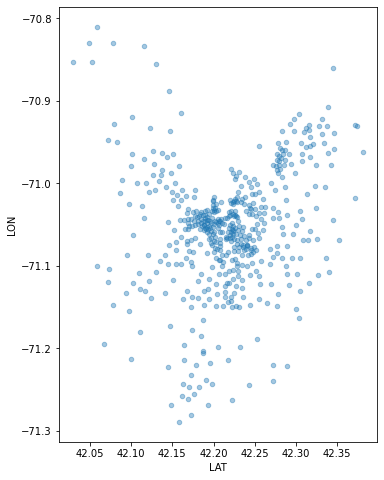

In [0]:
map(df, 'LAT', 'LON')

In [0]:
def plotly_map(df):
  # import plotly.express as p  
  # fig = px.scatter_geo(df, locations="iso_alpha",
  #                    size="pop", # size of markers, "pop" is one of the columns of gapminder
  #                    )

  import plotly.graph_objects as go
  fig = go.Figure(data=go.Scattergeo(
    locationmode = 'USA-states',
    lon = df['LON'],
    lat = df['LAT'],
    text = df['TOWN'],
    mode = 'markers',
    marker_color = df['MEDV'],
  ))

  fig.update_layout(
    title = '1970 Boston Housing values, corrected',
    geo_scope='usa',
  )
  fig.show()

plotly_map(df)

## aborted attempts at maps


In [0]:
def chloro(df):
  from urllib.request import urlopen
  import json
  with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
      counties = json.load(response)

  # import pandas as pd
  # df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
  #                   dtype={"fips": str})

  import plotly.express as px

  fig = px.choropleth_mapbox(df, geojson=counties, lat='LAT', lon='LON', color='MEDV',
                            color_continuous_scale="Viridis",
                            # range_color=(0, 12),
                            mapbox_style="carto-positron",
                            zoom=3,
                            #  center = {"lat": 37.0902, "lon": -95.7129},
                            opacity=0.5,
                            labels={'MEDV':'Median house value'}
                            )
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()

chloro(df)

TypeError: ignored

In [0]:
# example of walking through analysis https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [0]:
!pip install basemap
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [0]:
!pip install mapboxgl

In [0]:
!pip install ipyleaflet

In [0]:
# see https://github.com/mapbox/mapboxgl-jupyter
def try_mapbox():
  import os

  import pandas as pd

  from mapboxgl.utils import create_color_stops, df_to_geojson
  from mapboxgl.viz import CircleViz


  # Load data from sample csv
  data_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/points.csv'
  df = pd.read_csv(data_url)

  # Must be a public token, starting with `pk`
  token = os.getenv('MAPBOX_ACCESS_TOKEN')

  # Create a geojson file export from a Pandas dataframe
  df_to_geojson(df, filename='points.geojson',
                properties=['Avg Medicare Payments', 'Avg Covered Charges', 'date'],
                lat='lat', lon='lon', precision=3)

  # Generate data breaks and color stops from colorBrewer
  color_breaks = [0,10,100,1000,10000]
  color_stops = create_color_stops(color_breaks, colors='YlGnBu')

  # Create the viz from the dataframe
  viz = CircleViz('points.geojson',
                  access_token=token,
                  height='400px',
                  color_property = "Avg Medicare Payments",
                  color_stops = color_stops,
                  center = (-95, 40),
                  zoom = 3,
                  below_layer = 'waterway-label'
                )
  viz.show()
try_mapbox()

In [0]:
from ipyleaflet import Map, Marker

center = (52.204793, 360.121558)

m = Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)
m.add_layer(marker);

display(m)

In [0]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)


## folium!

In [0]:
import folium

In [0]:
def map1(df):
  m = folium.Map(location=[42.361145, -71.057083]) # boston
  m.add_child(folium.LatLngPopup())

  median_value = df['MEDV'].median()
  for index, row in df.iterrows():
    # if index % 10 != 0:
    #   continue

    text = "{}, {}".format(row['TOWN'], row['MEDV'])
    color = 'green' if row['MEDV'] >= median_value else 'blue'
    folium.Marker(
      location=[row['LAT'], row['LON']],
      popup=text,
      icon=folium.Icon(color=color),
      tooltip=text
    ).add_to(m)
    # folium.Circle(
    #     radius=100,  # เมตร
    #     location=[45.5244, -122.6699],
    #     popup='The Waterfront',
    #     color='crimson',
    #     fill=False,
    # ).add_to(m)

    # folium.CircleMarker(
    #     radius=50,   # pixel
    #     location=[45.5215, -122.6261],
    #     popup='Laurelhurst Park',
    #     color='#3186cc',
    #     fill=True,
    #     fill_color='#3186cc'
    # ).add_to(m)
  return m
map1(df)

NameError: ignored

In [0]:
df['MEDV'].median()

# scikit-scaling

In [0]:
# https://scikit-fairness.netlify.app/fairness_boston_housing.html

In [0]:
import matplotlib.pylab as plt
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

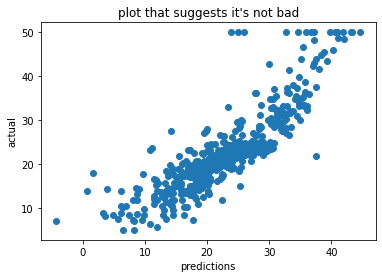

In [0]:
def one():
  X, y = load_boston(return_X_y=True)

  pipe = Pipeline([
      ("scale", StandardScaler()),
      ("model", LinearRegression())
  ])

  plt.scatter(pipe.fit(X, y).predict(X), y)
  plt.xlabel("predictions")
  plt.ylabel("actual")
  plt.title("plot that suggests it's not bad");
one()

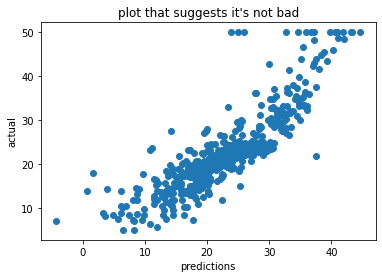

In [0]:
def two():
  X, y = load_boston(return_X_y=True)

  pipe = Pipeline([
      # ("scale", StandardScaler()),
      ("model", LinearRegression())
  ])

  plt.scatter(pipe.fit(X, y).predict(X), y)
  plt.xlabel("predictions")
  plt.ylabel("actual")
  plt.title("two: unscaled");
one()

In [0]:
# X, y = load_boston(return_X_y=True)
# pipe = Pipeline([
#   ("scale", StandardScaler())
# ])
# pipe.fit(X, y)
scaled_X = StandardScaler().fit_transform(X)

In [0]:
facetize(pd.DataFrame(X))

In [0]:
facetize(pd.DataFrame(scaled_X))

In [0]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [0]:
pd.DataFrame(scaledX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302
